In [13]:
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import geopandas as gpd

import requests
from bs4 import BeautifulSoup

pd.options.display.max_columns = 999
pd.options.display.max_rows = 1999
pd.options.display.max_colwidth = 200

# import yaml
from paths import *
from scripts import manipulation
from scripts import io
from scripts import vis_graphs

import unidecode
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, offline
from scripts import vis_layout

import yaml


## Manipulate Data from SEADE

In [10]:
#load variables and geocodes
var, geocode_seade = io.load_variables_geocodes()

#load KPIs, last kpi and historic
df_last, dh_history = io.load_kpis()

#merge the variables and geocodes with KPIs
dd = manipulation.merge_data(df_last,dh_history, var, geocode_seade)

#load shapefiles
sp = gpd.read_file('../../brasil_geodata/maps/sp_municipios.json')
sp = sp[['geocodigo','geometry']]

## Educacao
 - [QEdu](https://www.qedu.org.br/) 
 - [Dados Abertos da Educação de SP](https://dados.educacao.sp.gov.br/search/type/dataset)
 - [INEP - Microdados](http://portal.inep.gov.br/microdados#)
 - [IDEB](http://portal.inep.gov.br/web/guest/educacao-basica/ideb/resultados)
 - [Censo Escolar - BI](https://inepdata.inep.gov.br/analytics/saw.dll?Portal&PortalPath=%2Fshared%2FEduca%C3%A7%C3%A3o%20B%C3%A1sica%20-%20Acesso%20Externo%2FArquivos%2FCenso%2FConsolidado%2FInforma%C3%A7%C3%B5es%20Consolidadas%2FFun%C3%A7%C3%B5es%20Docentes%2FPanorama%20deFun%C3%A7%C3%B5es%20Docentes%20na%20Educa%C3%A7%C3%A3o%20B%C3%A1sica)



In [15]:
dd.head()

localidade                                            variavel  \
0           Aparecida  Arrecadação Municipal de Contribuições de Melhoria   
1              Arapeí  Arrecadação Municipal de Contribuições de Melhoria   
2              Areias  Arrecadação Municipal de Contribuições de Melhoria   
3             Bananal  Arrecadação Municipal de Contribuições de Melhoria   
4  Cachoeira Paulista  Arrecadação Municipal de Contribuições de Melhoria   

              unidade    periodo   ano  valor       tipo  portal  absolute  \
0  (Em reais de 2019)  1980-2011  2013   21.0  economico     1.0       1.0   
1  (Em reais de 2019)  1980-2011  2013    NaN  economico     1.0       1.0   
2  (Em reais de 2019)  1980-2011  2013    NaN  economico     1.0       1.0   
3  (Em reais de 2019)  1980-2011  2013    NaN  economico     1.0       1.0   
4  (Em reais de 2019)  1980-2011  2013    NaN  economico     1.0       1.0   

   percapta  geocodigo populacao       sufix  
0       1.0  3502507.0     35219  per capita  
1       1.0  3503158.0      2481              
2       1.0  3503505.0      3730              
3       1.0  3504909.0     10341              
4       1.0  3508603.0     30756

In [53]:
dd_educacao = dd[dd['tipo']=='educacao']

mask = dd['localidade']=='Taubaté'
variables = dd_educacao[mask]['variavel'].tolist()

In [54]:
themes = yaml.load(open('../themes/vale_themes.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['vale_bars']

var_file = {}

for var in variables:
    #variables name and file dict
    var_file,file_name = vis_graphs.variable_name_file_name(dd_educacao,var_file,var)
    
#     #plot bars
#     fig = vis_graphs.plot_bars(dd_educacao,var,themes)
#     plot(fig, filename=f"../../sample_pages/pages/indicadores_vale/pages/educacao/images/bars/{file_name}.html", auto_open=False)
    
#     #plot maps
#     fig_map = vis_graphs.plot_map(dd_educacao,sp,var)
#     fig_map.savefig(f"../../sample_pages/pages/indicadores_vale/pages/educacao/images/maps/{file_name}.png", bbox_inches='tight')


In [55]:
for var in var_file.keys():
    print(f"<option value='{var_file[var]}'>{var}</option>")

<option value='concluintes_do_ensino_fundamental'>Concluintes do Ensino Fundamental a cada 100 mil habitantes - (2013) - Não possui unidade</option>
<option value='concluintes_do_ensino_medio'>Concluintes do Ensino Médio a cada 100 mil habitantes - (2013) - Não possui unidade</option>
<option value='matriculas_na_creche'>Matrículas na Creche a cada 100 mil habitantes - (2019) - Não possui unidade</option>
<option value='matriculas_na_educacao_infantil'>Matrículas na Educação Infantil a cada 100 mil habitantes - (2019) - Não possui unidade</option>
<option value='matriculas_na_preescola'>Matrículas na Pré-escola a cada 100 mil habitantes - (2019) - Não possui unidade</option>
<option value='matriculas_no_ensino_fundamental'>Matrículas no Ensino Fundamental a cada 100 mil habitantes - (2019) - Não possui unidade</option>
<option value='matriculas_no_ensino_medio'>Matrículas no Ensino Médio a cada 100 mil habitantes - (2019) - Não possui unidade</option>
<option value='meta_do_indice_de_d

## Demografia



In [49]:
dd_demografia = dd[dd['tipo']=='demografico']

mask = dd['localidade']=='Taubaté'
variables = dd_demografia[mask]['variavel'].tolist()

In [50]:
themes = yaml.load(open('../themes/vale_themes.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['vale_bars']

var_file = {}

for var in variables:
    print(var)
    #variables name and file dict
    var_file,file_name = vis_graphs.variable_name_file_name(dd_demografia,var_file,var)
    
    #plot bars
#     fig = vis_graphs.plot_bars(dd_demografia,var,themes)
#     plot(fig, filename=f"../../sample_pages/pages/indicadores_vale/pages/demografico/images/bars/{file_name}.html", auto_open=False)
    
#     #plot maps
#     fig_map = vis_graphs.plot_map(dd_demografia,sp,var)
#     fig_map.savefig(f"../../sample_pages/pages/indicadores_vale/pages/demografico/images/maps/{file_name}.png", bbox_inches='tight')
    

Densidade Demográfica
Eleitores
Empregos Formais
Esgoto Sanitário - Nível de Atendimento - Censo Demográfico
Frota de Automóveis
Frota de Caminhões
Frota de Veículos - Total
Frota de Ônibus
População
População Amarela - Censo Demográfico
População Branca - Censo Demográfico
População Feminina
População Indígena - Censo Demográfico
População Masculina
População Parda - Censo Demográfico
População Preta - Censo Demográfico
População Rural
População Urbana
População com 60 Anos e Mais
Índice de Desenvolvimento Humano Municipal - IDHM
Índice de Desenvolvimento Humano Municipal - IDHM - Ranking dos Municípios
Índice de Desenvolvimento Humano Municipal - IDHM Longevidade
Índice de Envelhecimento


In [51]:
for var in var_file.keys():
    print(f"<option value='{var_file[var]}'>{var}</option>")

<option value='densidade_demografica'>Densidade Demográfica  - (2020) - (Habitantes/km2)</option>
<option value='eleitores'>Eleitores a cada 100 mil habitantes - (2018) - Não possui unidade</option>
<option value='empregos_formais'>Empregos Formais a cada 100 mil habitantes - (2018) - Não possui unidade</option>
<option value='esgoto_sanitario__nivel_de_atendimento__censo_demografico'>Esgoto Sanitário - Nível de Atendimento - Censo Demográfico  - (2010) - (Em %)</option>
<option value='frota_de_automoveis'>Frota de Automóveis a cada 100 mil habitantes - (2018) - Não possui unidade</option>
<option value='frota_de_caminhoes'>Frota de Caminhões a cada 100 mil habitantes - (2018) - Não possui unidade</option>
<option value='frota_de_veiculos__total'>Frota de Veículos - Total a cada 100 mil habitantes - (2018) - Não possui unidade</option>
<option value='frota_de_onibus'>Frota de Ônibus a cada 100 mil habitantes - (2018) - Não possui unidade</option>
<option value='populacao'>População  - 

## Economia



In [44]:
dd_economia = dd[dd['tipo']=='economico']

mask = dd_economia['localidade']=='Taubaté'
variables = dd_economia[mask]['variavel'].tolist()

Arrecadação Municipal de Contribuições de Melhoria
Arrecadação de IPTU
Arrecadação de ISS
Arrecadação de ITBI
Consumo de Energia Elétrica - Total
Despesas Municipais com Inativos e Pensionistas
Despesas Municipais com Inversões Financeiras
Despesas Municipais com Pessoal
Despesas Municipais com Pessoal e Encargos Sociais
Despesas Municipais na Subfunção Vigilância Epidemiológica
Despesas Municipais na Subfunção Vigilância Sanitária
Empregos Formais da Construção
Empregos Formais da Educação, Saúde Humana e Serviços Sociais
Empregos Formais da Indústria
Empregos Formais dos Serviços
PIB per Capita
Participação no PIB do Estado
Receita Municipal - IRRF
Renda per Capita - Censo Demográfico
Total da Receita Municipal
Total de Despesas Municipais
Valor das Exportações
Valor das Importações
Índice Paulista de Responsabilidade Social - IPRS - Dimensão Riqueza
Índice de Desenvolvimento Humano Municipal - IDHM Educação
Índice de Desenvolvimento Humano Municipal - IDHM Renda
Índice de Participaç

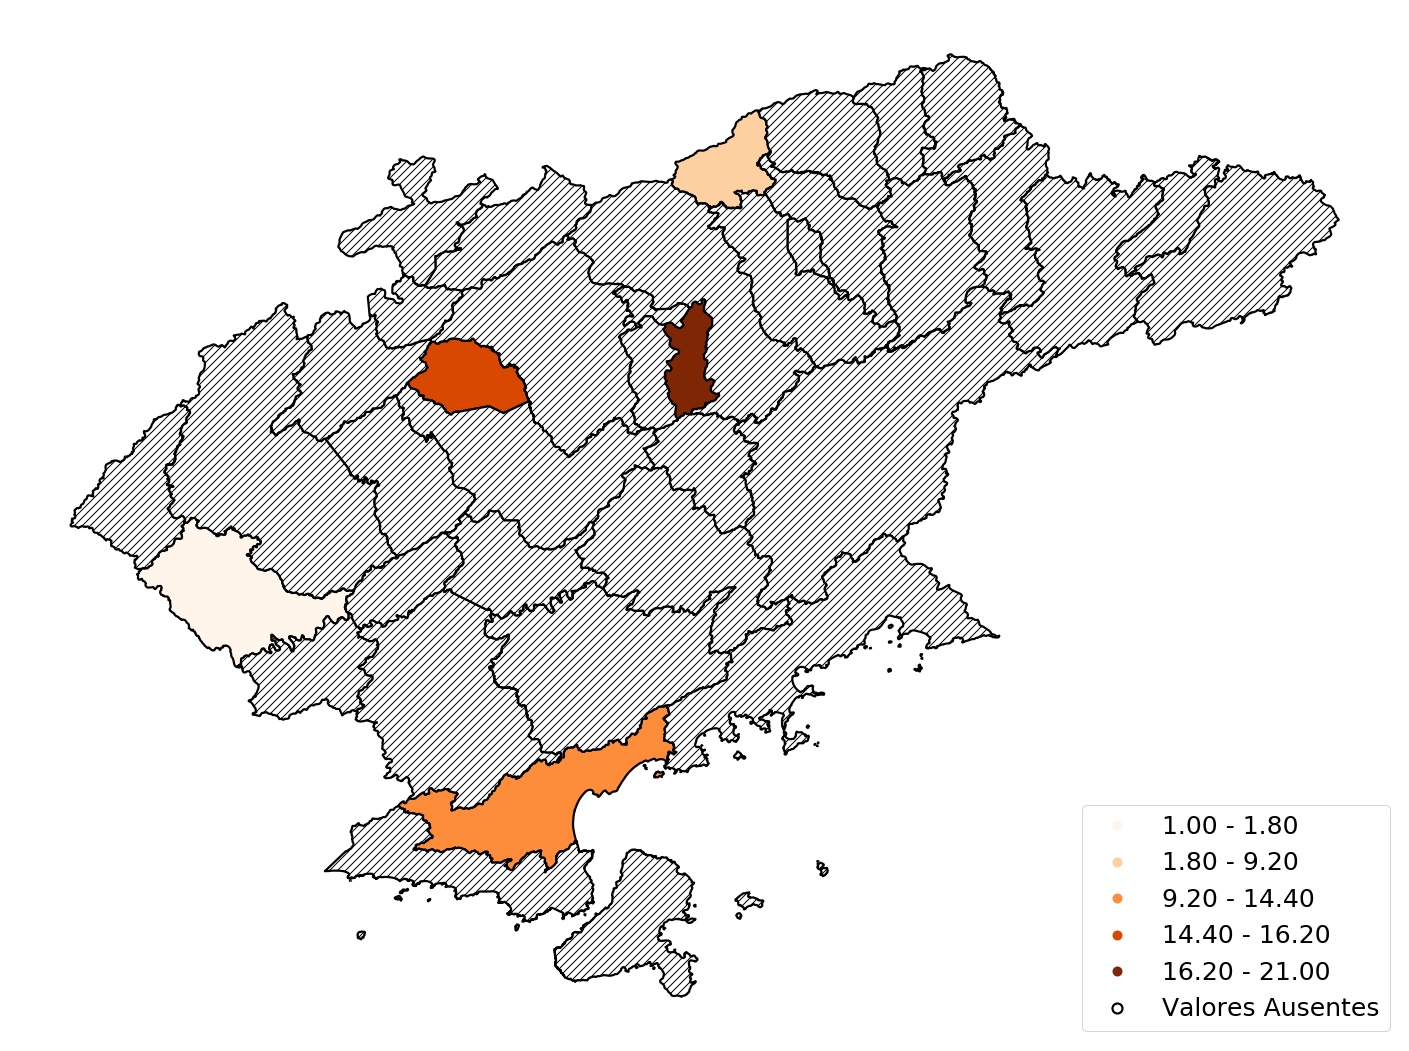

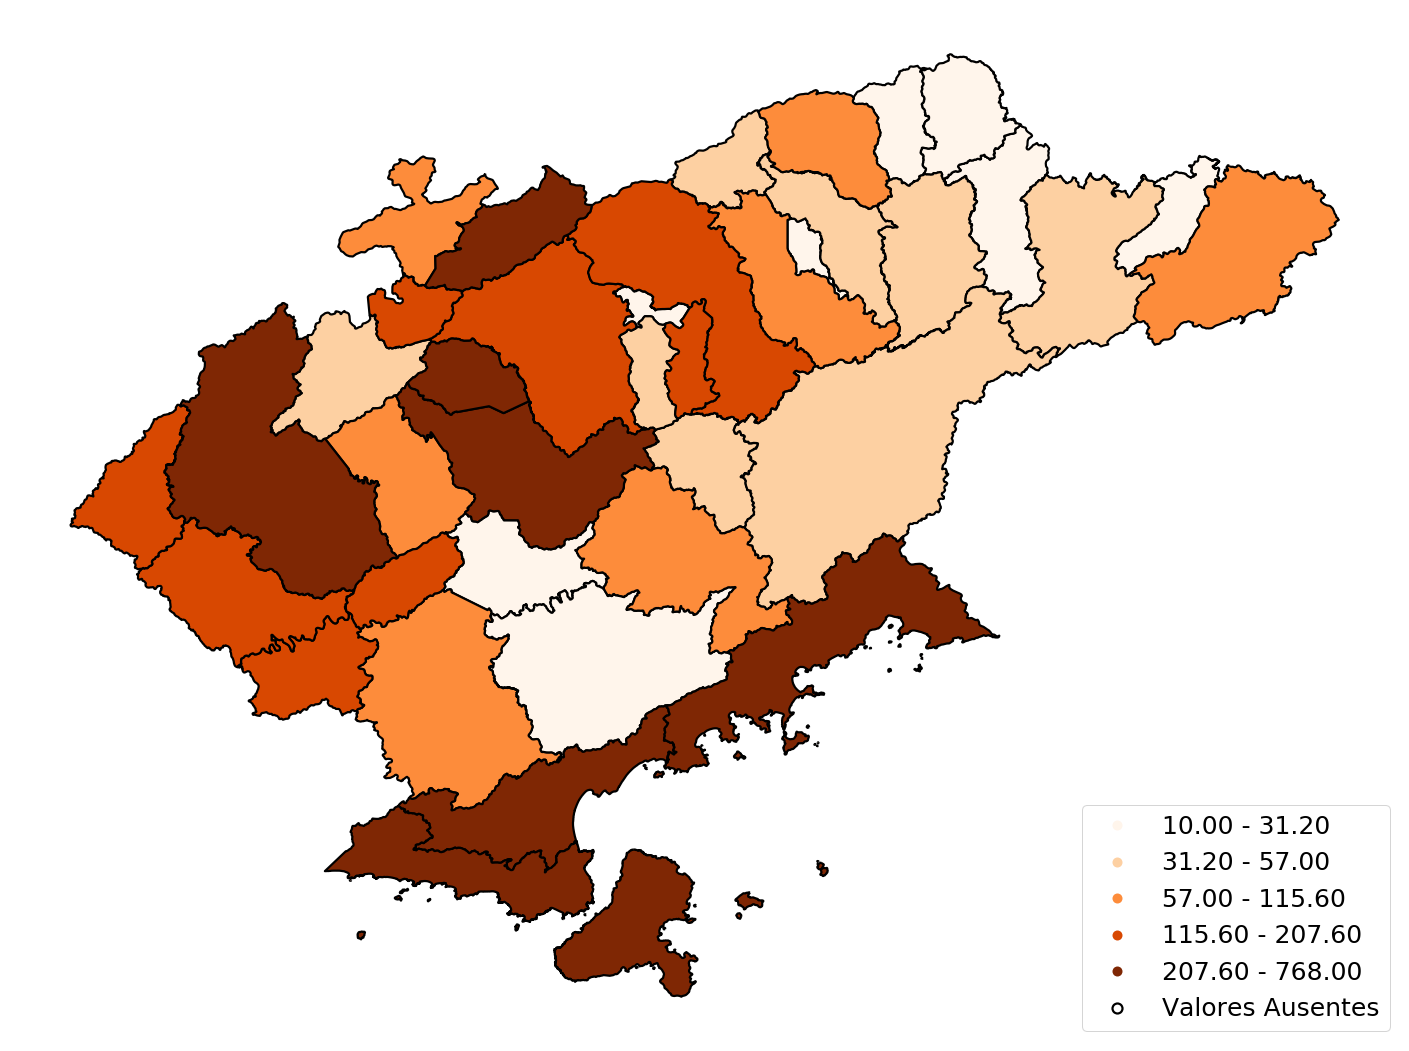

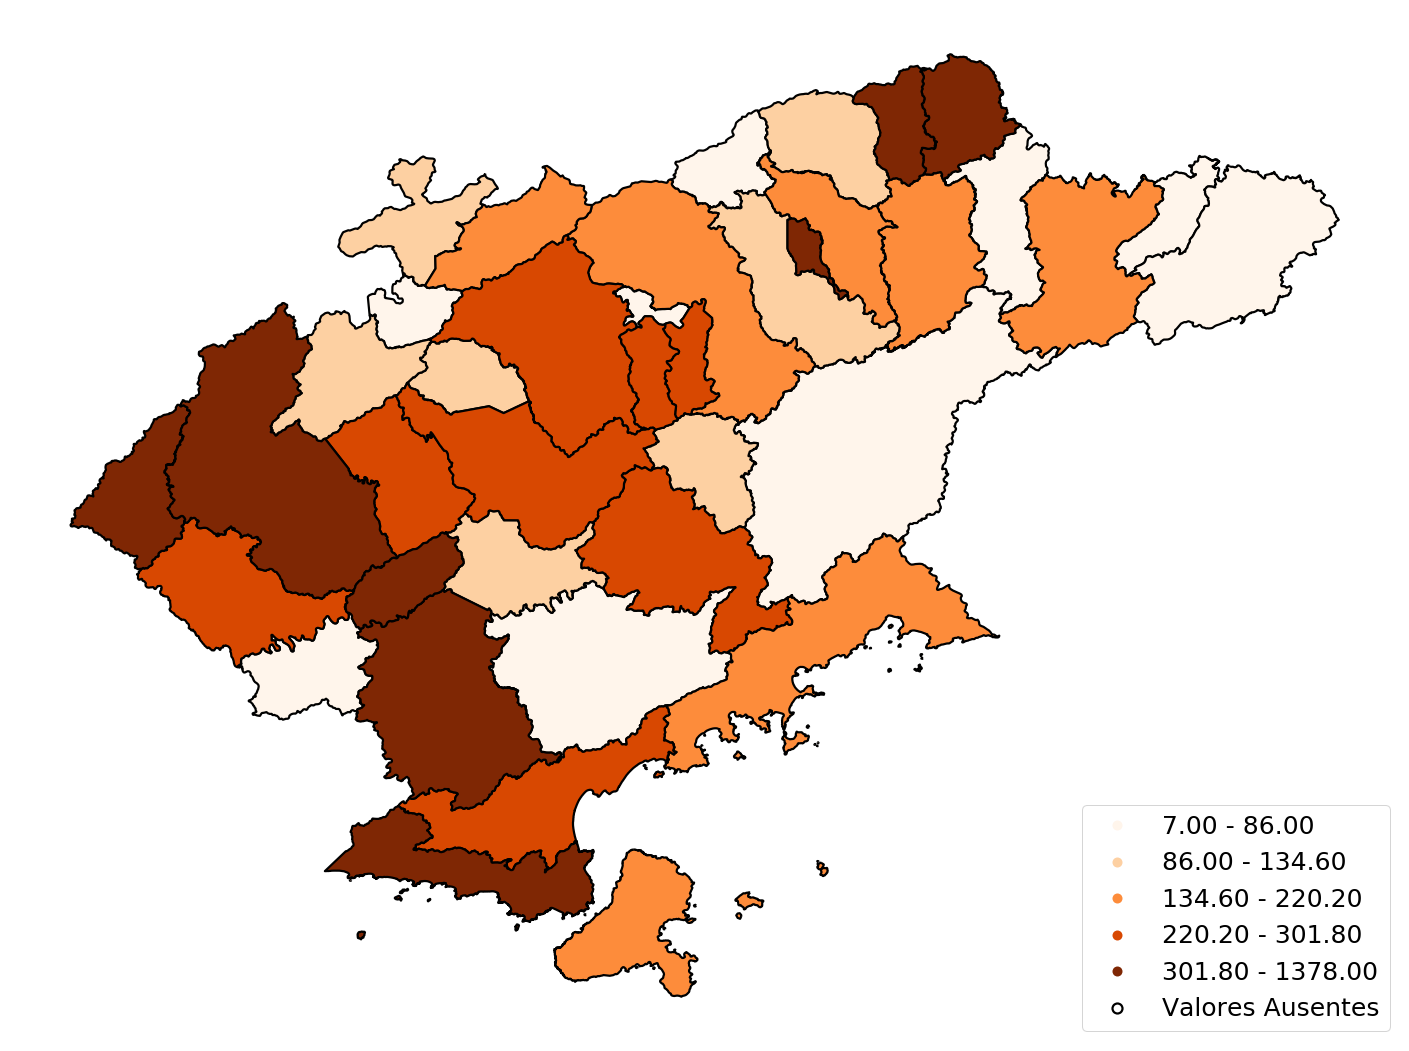

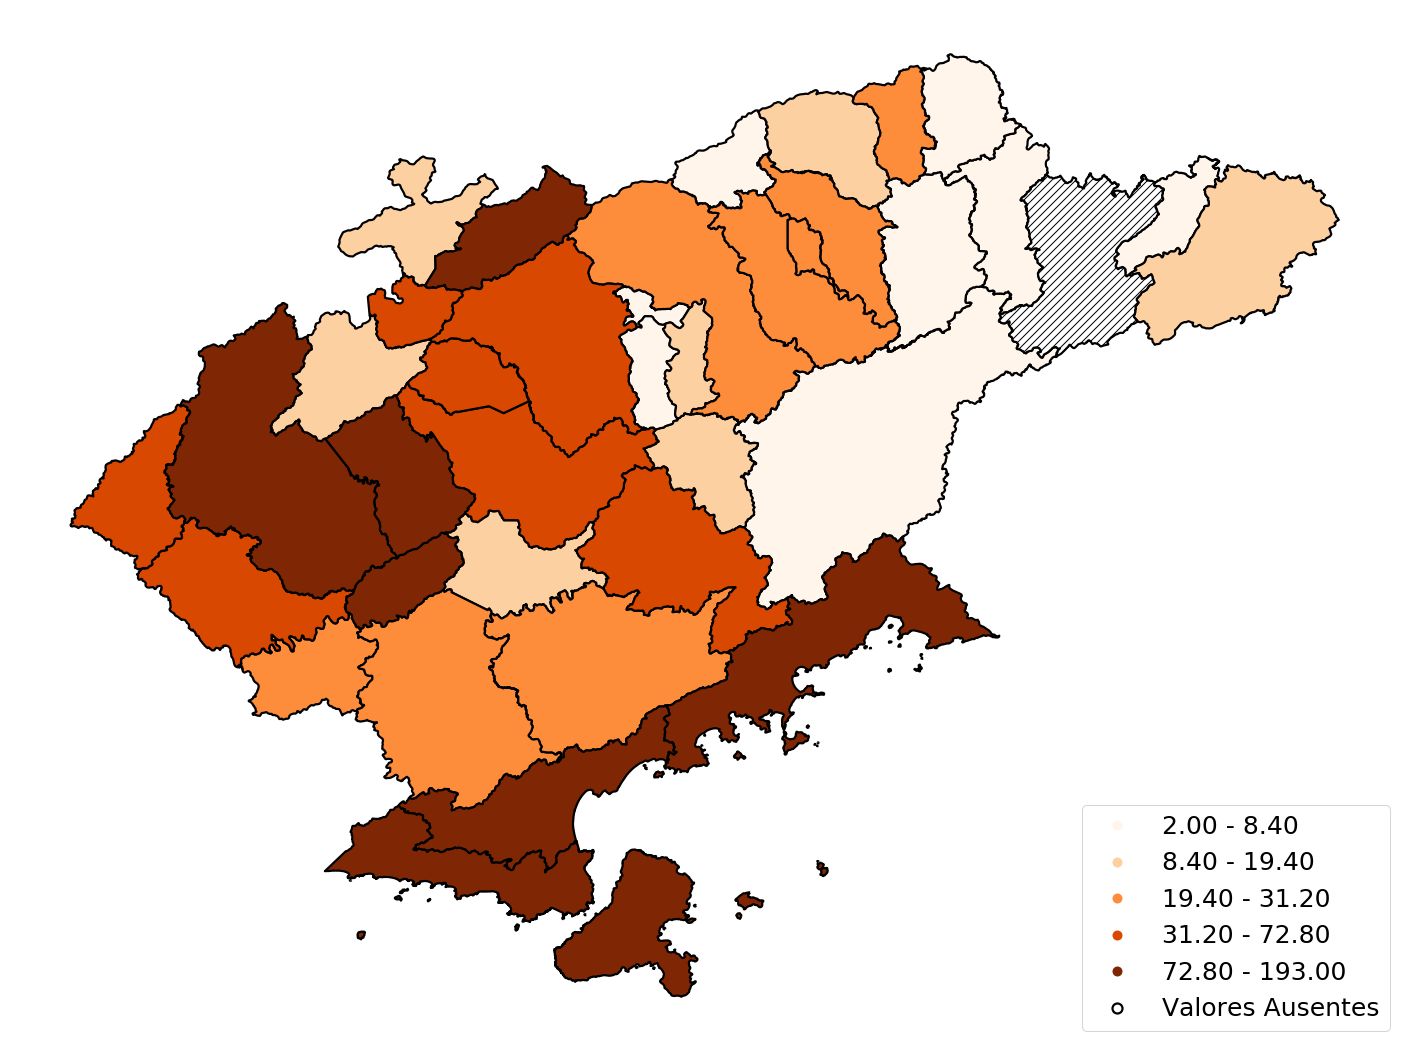

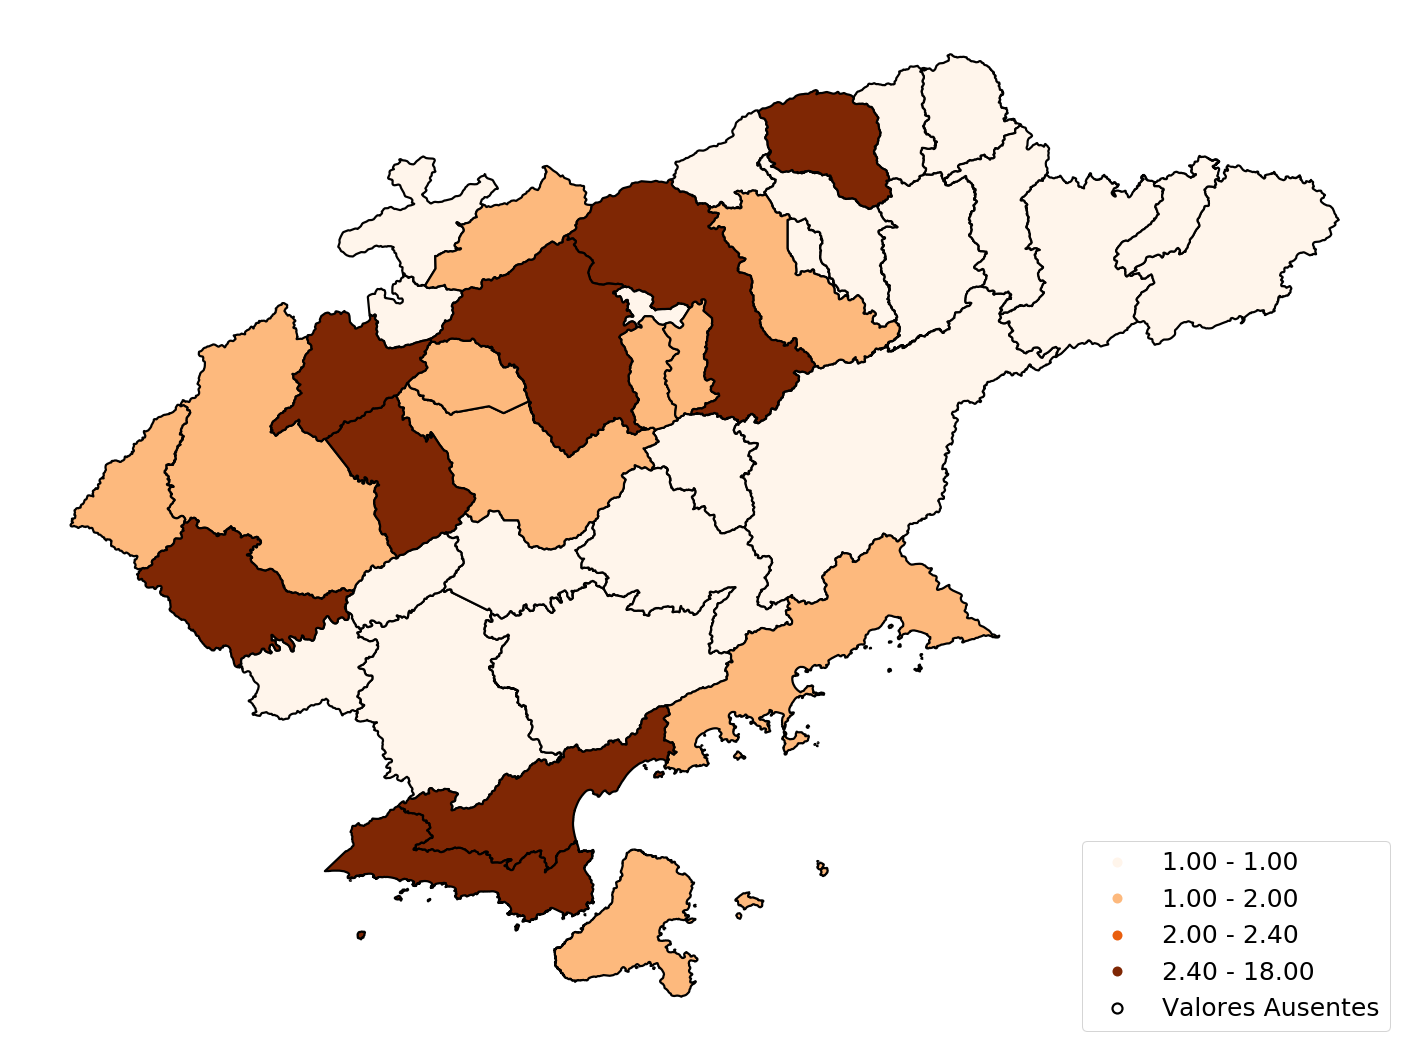

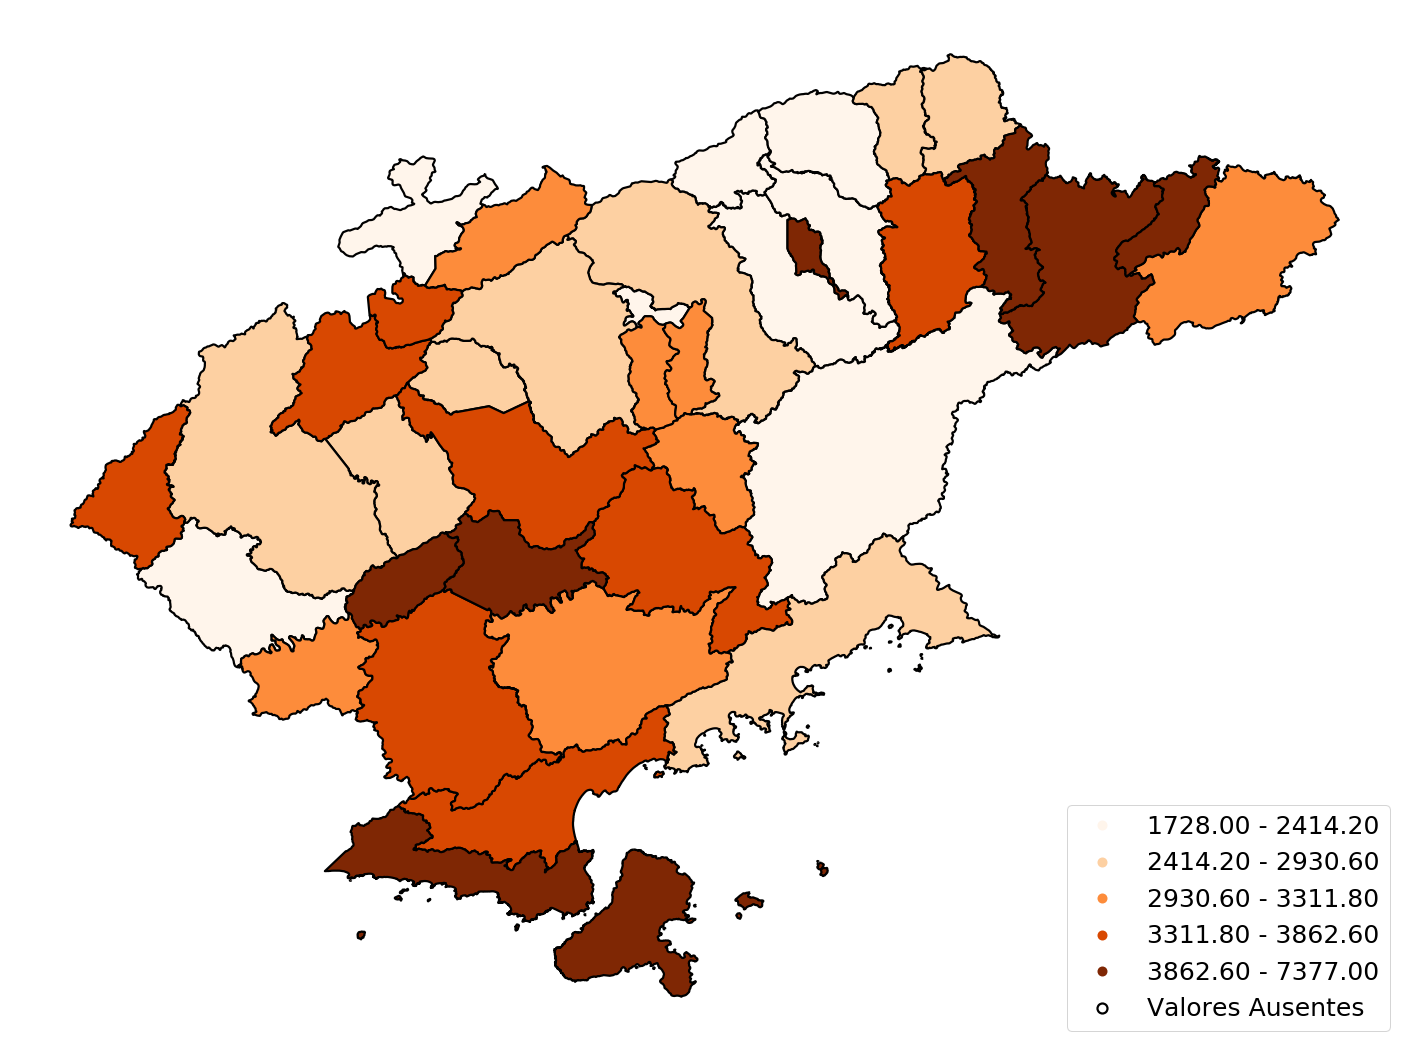

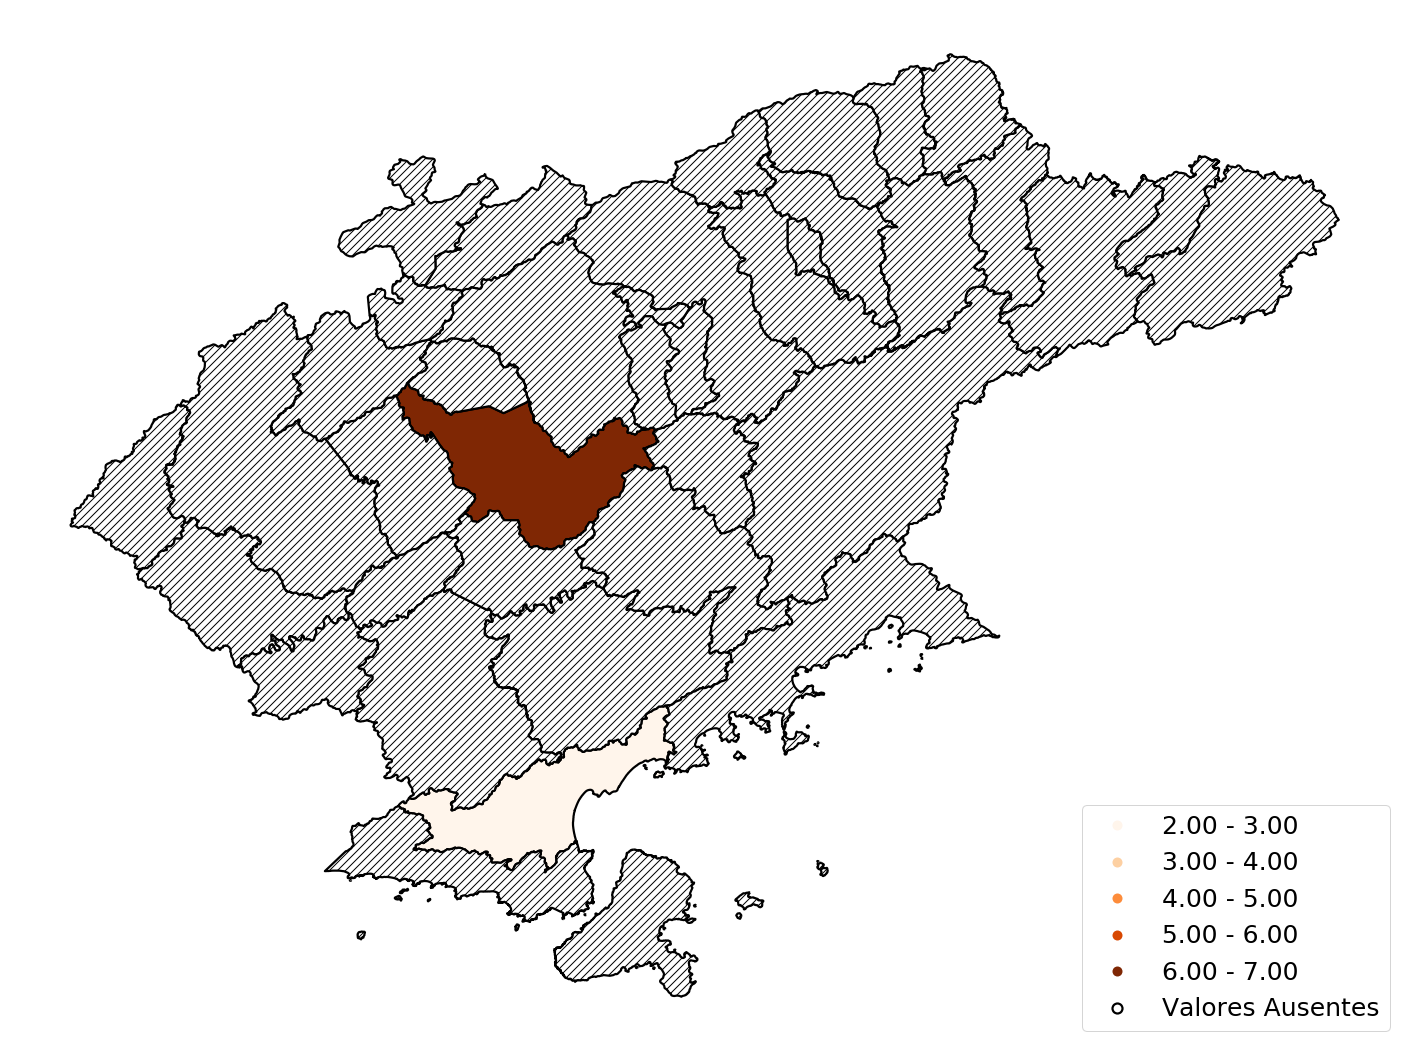

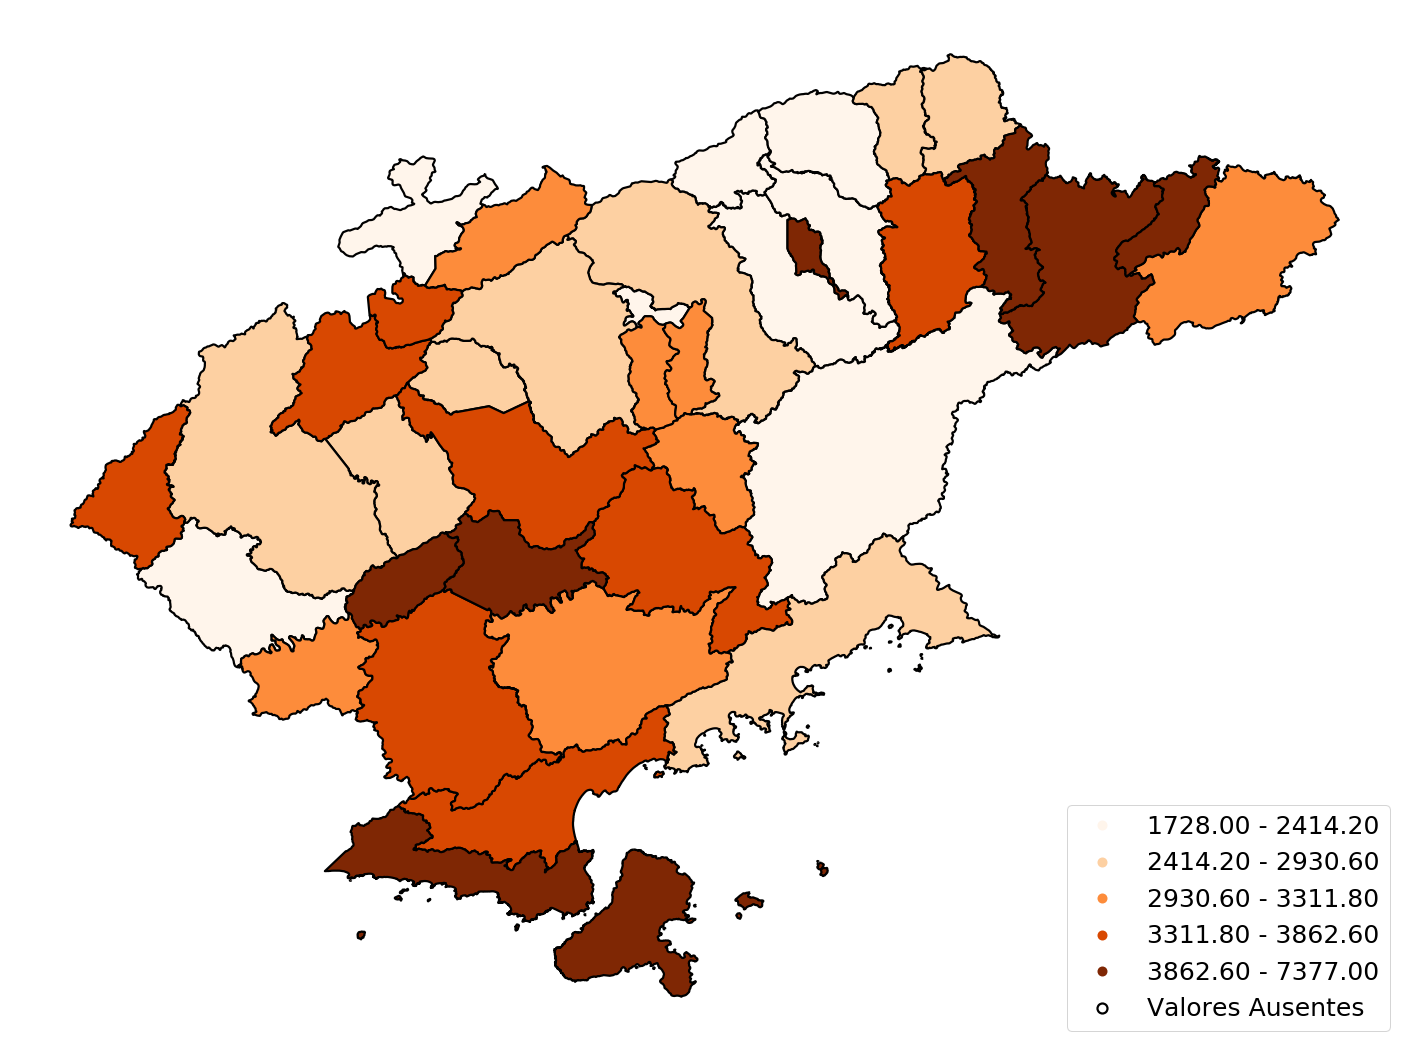

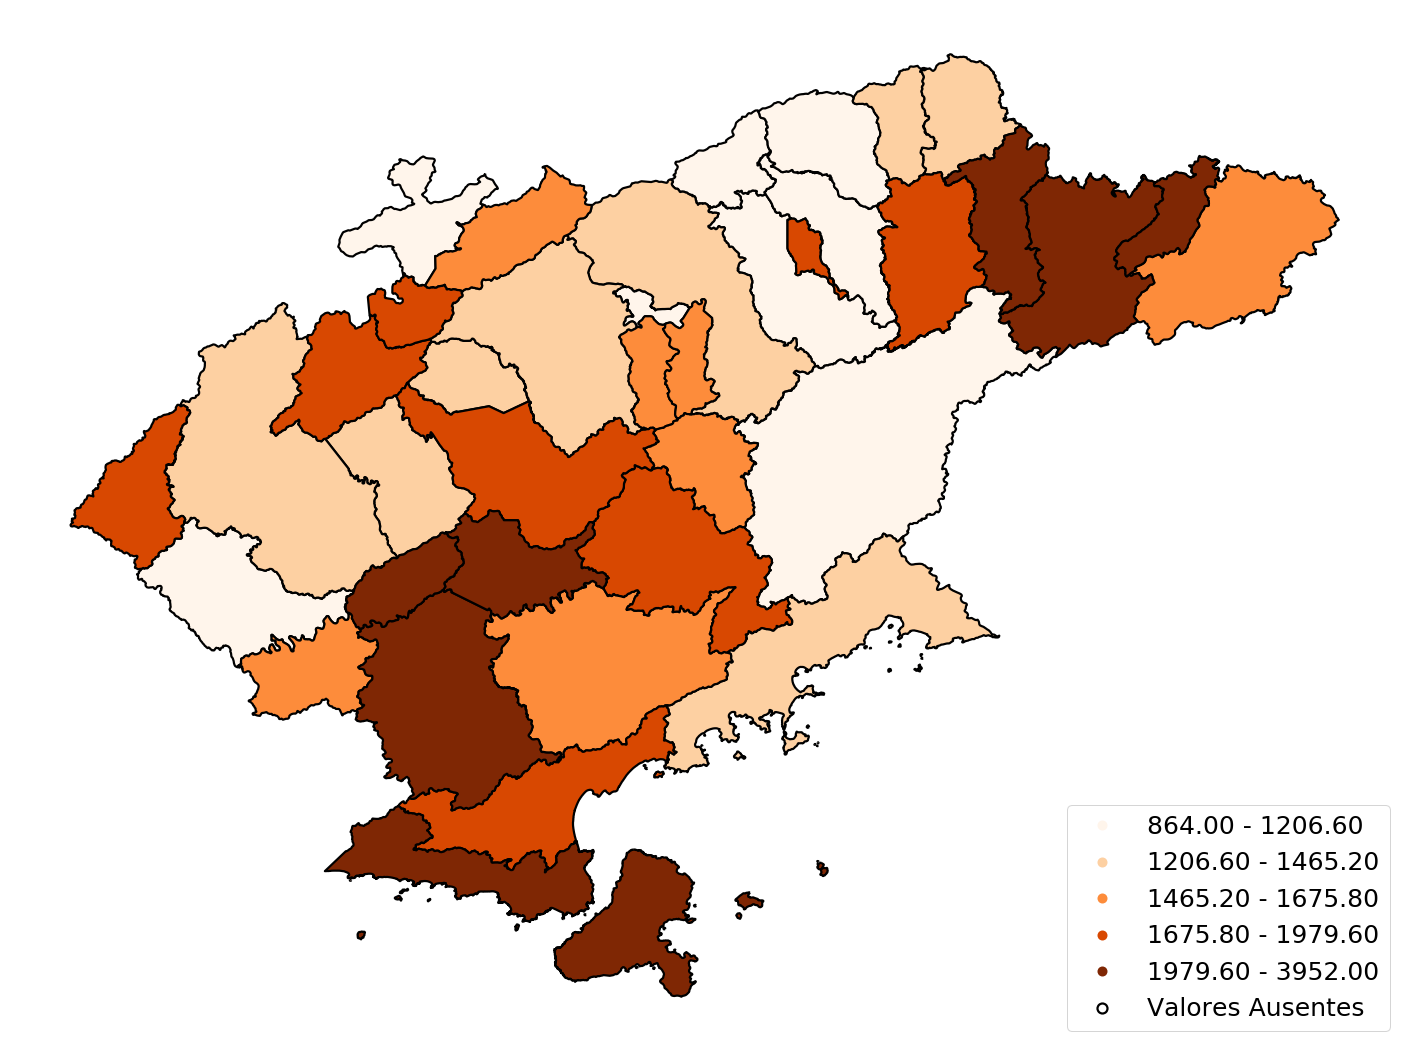

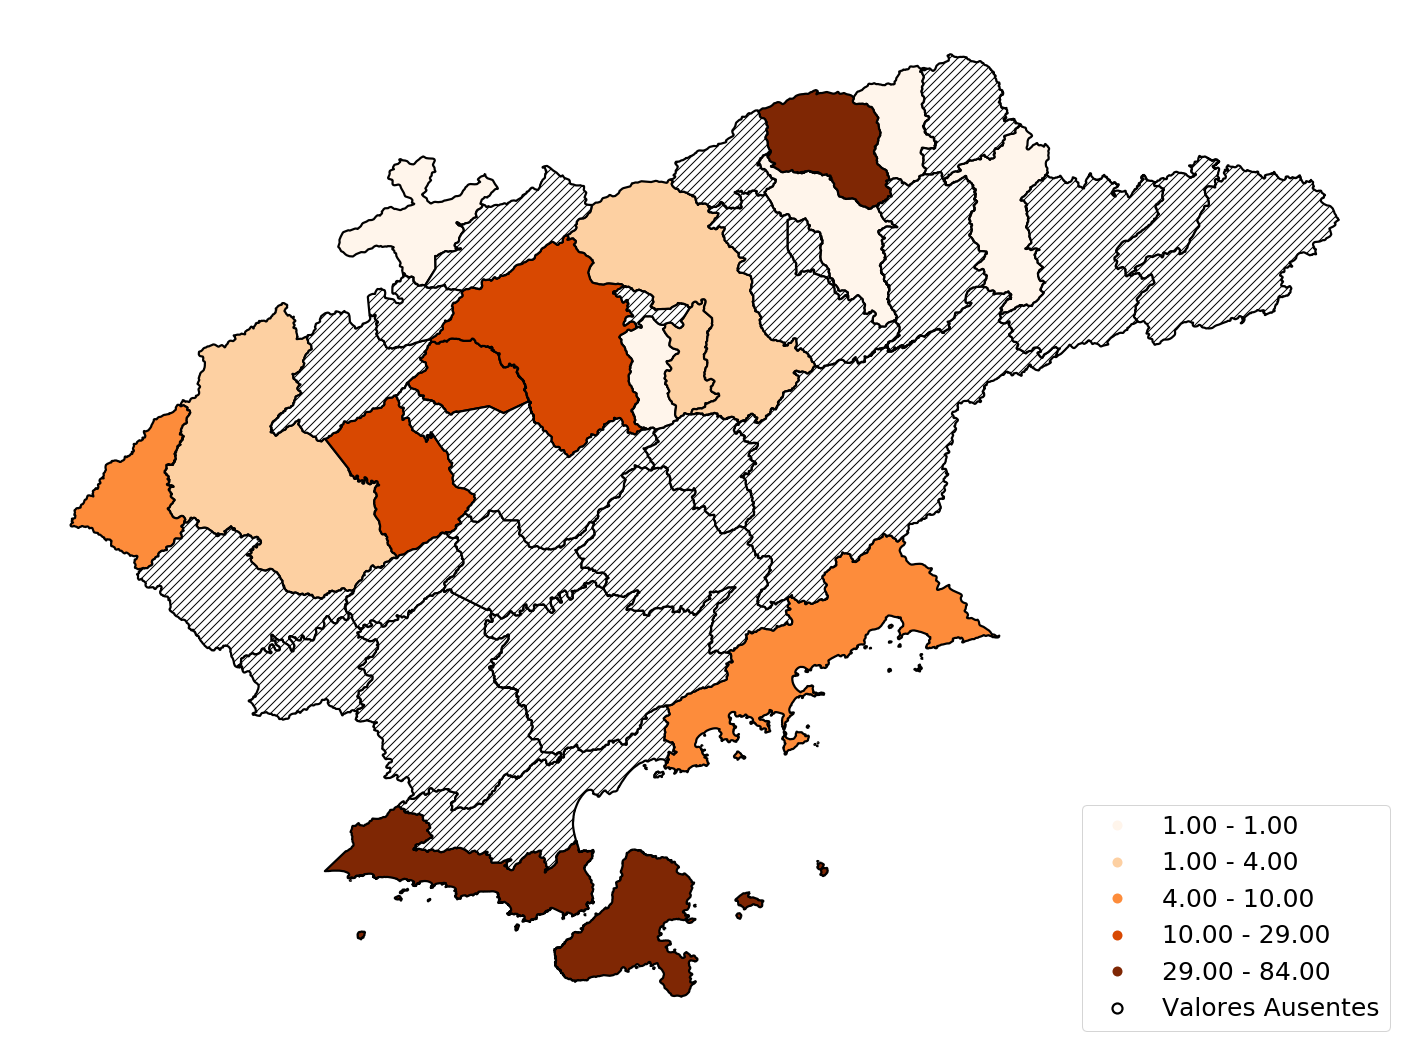

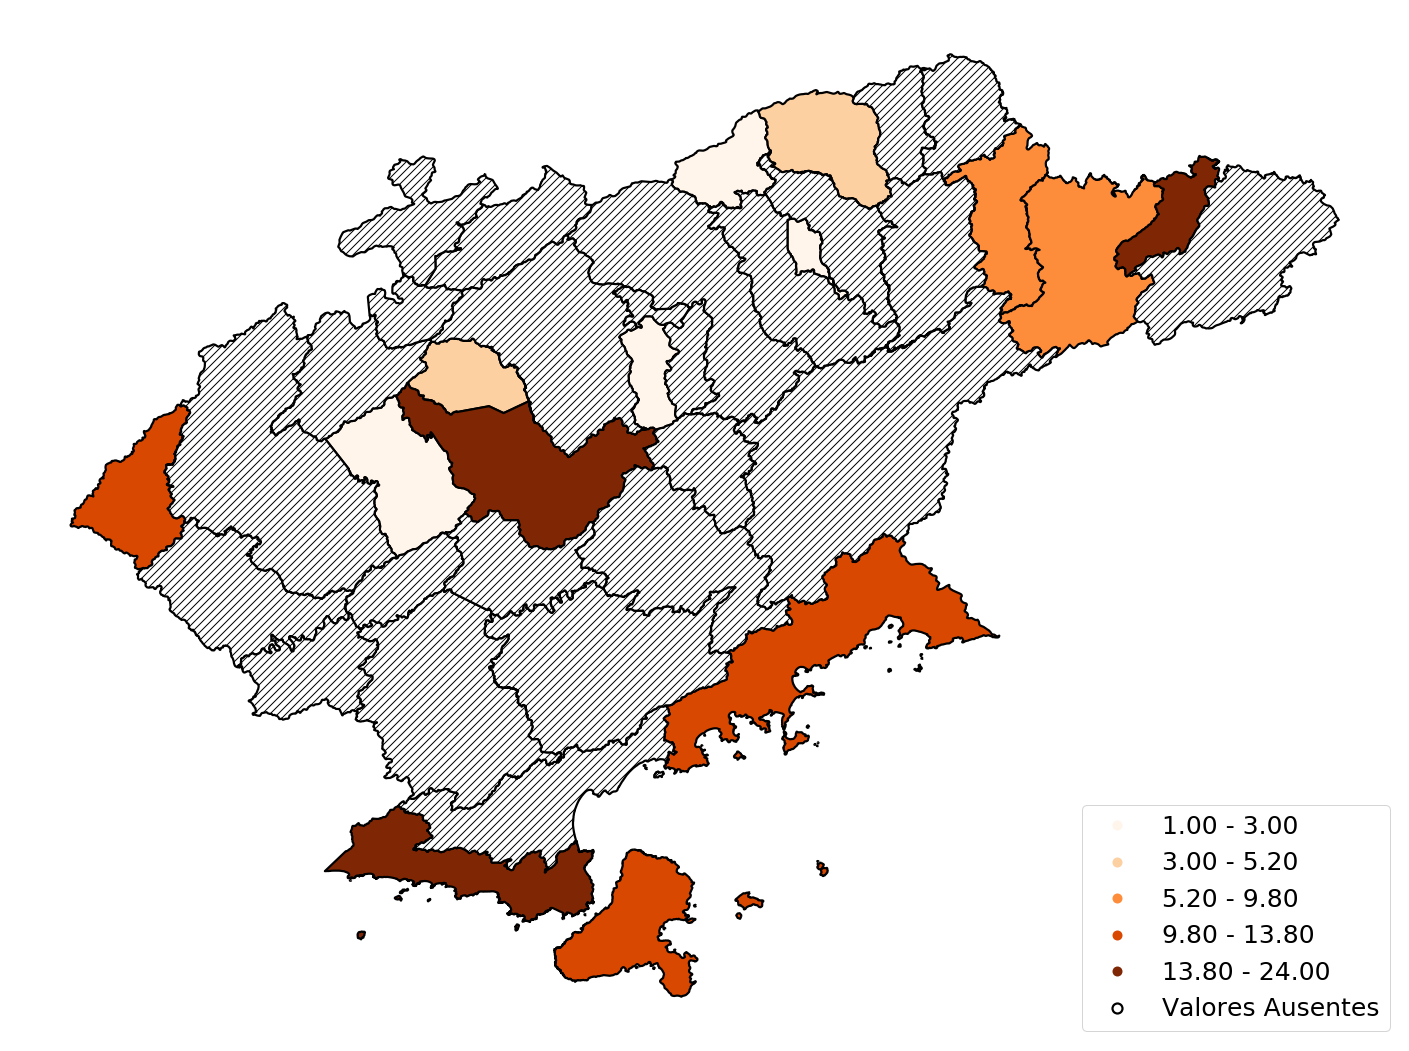

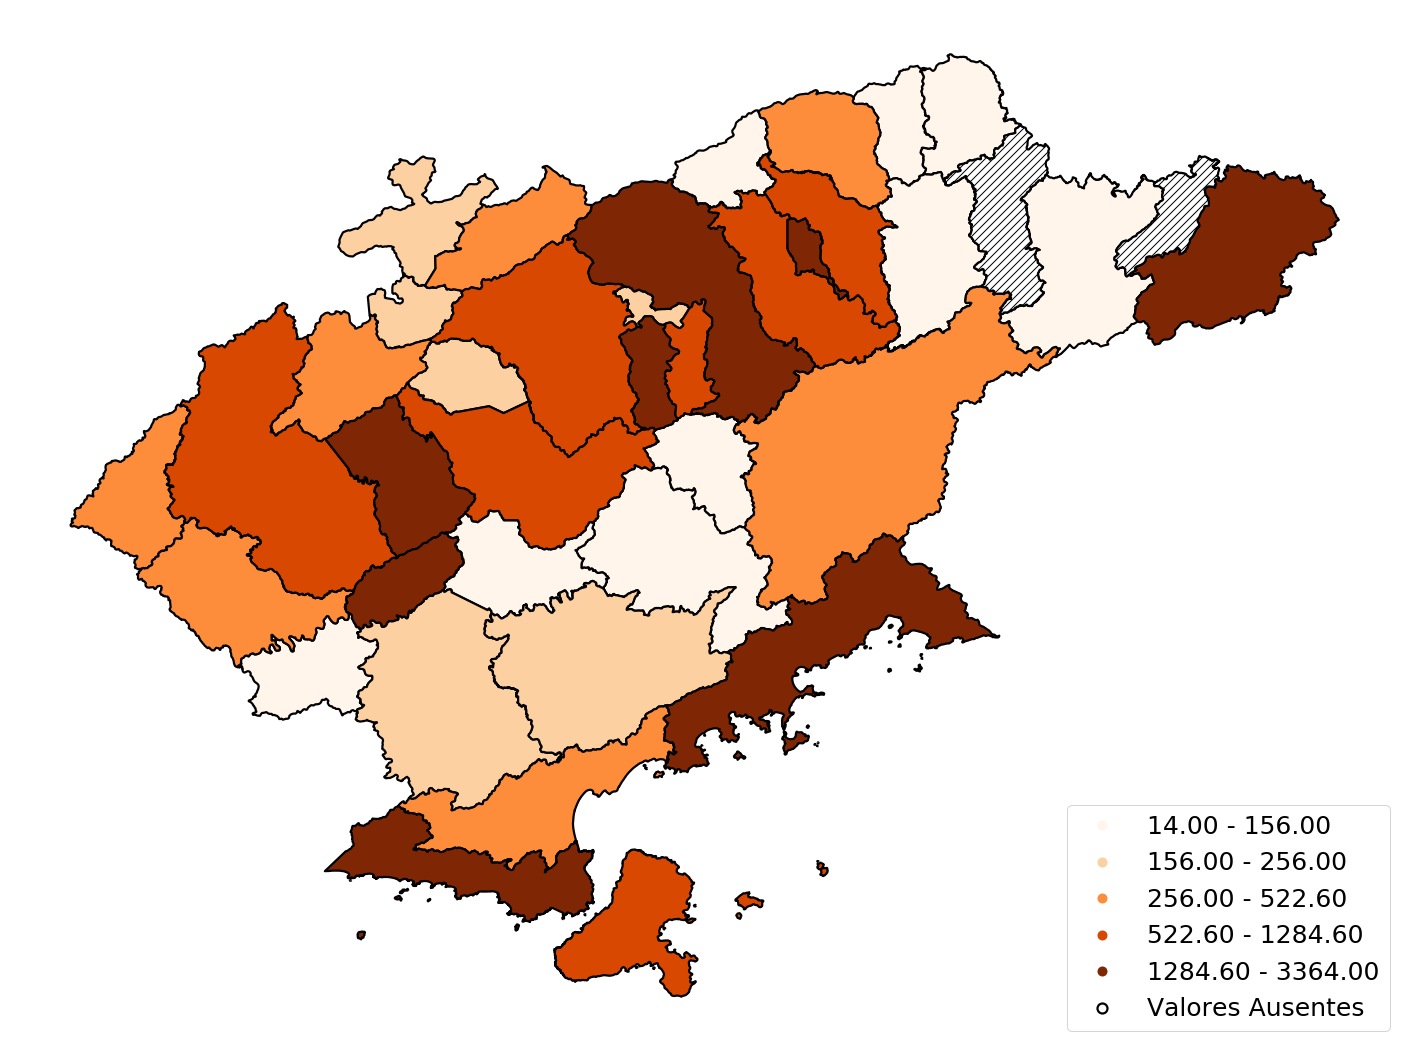

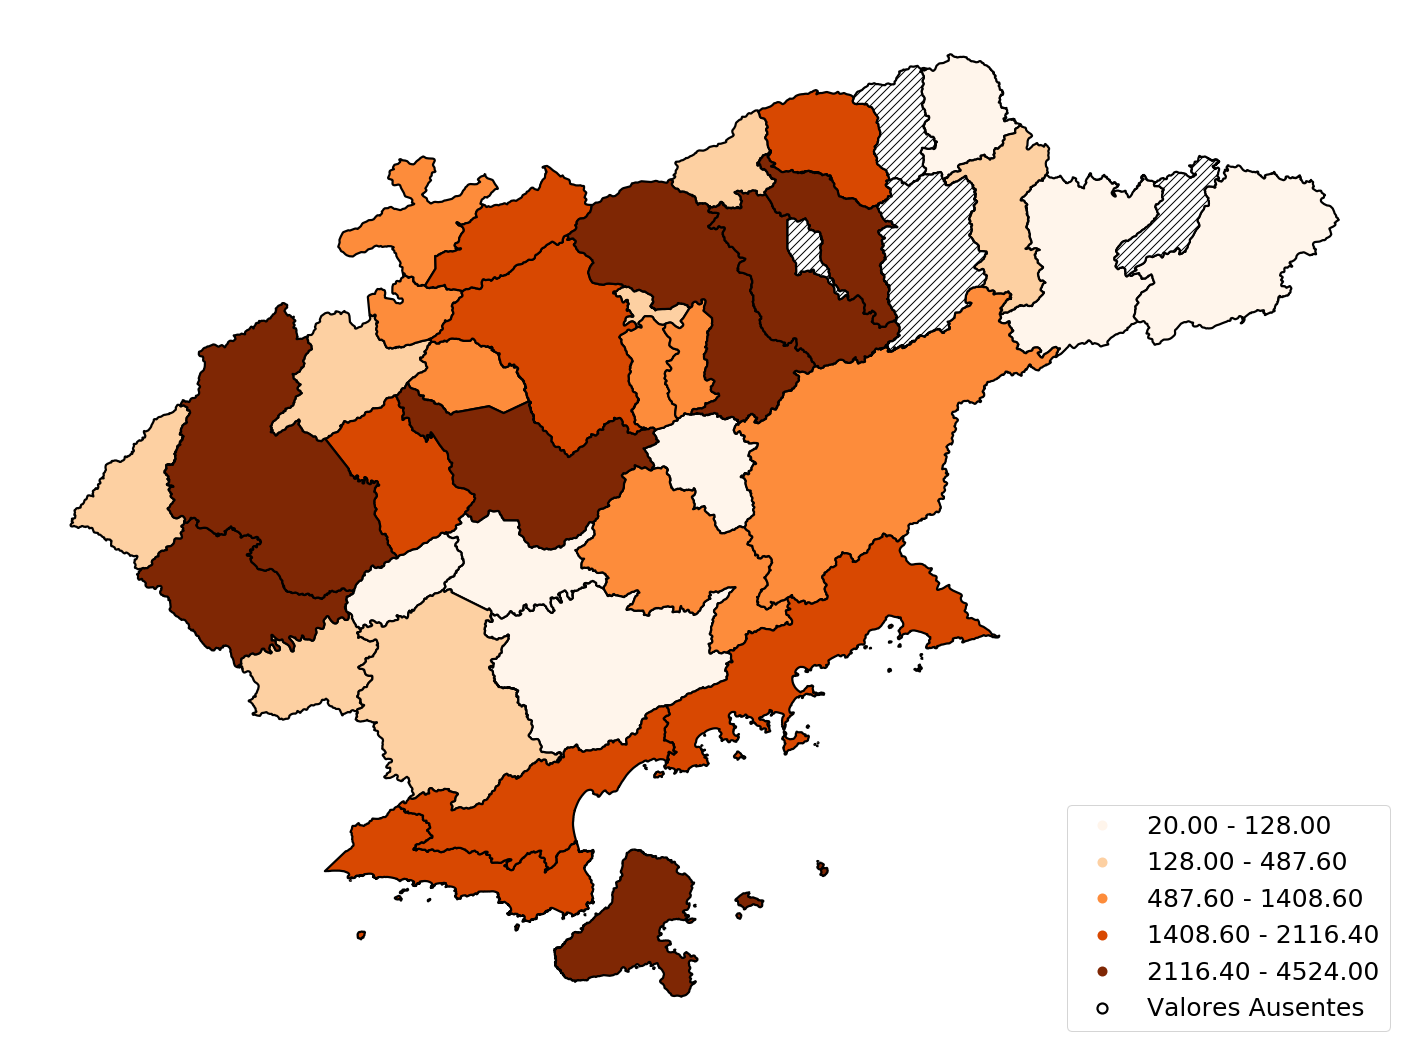

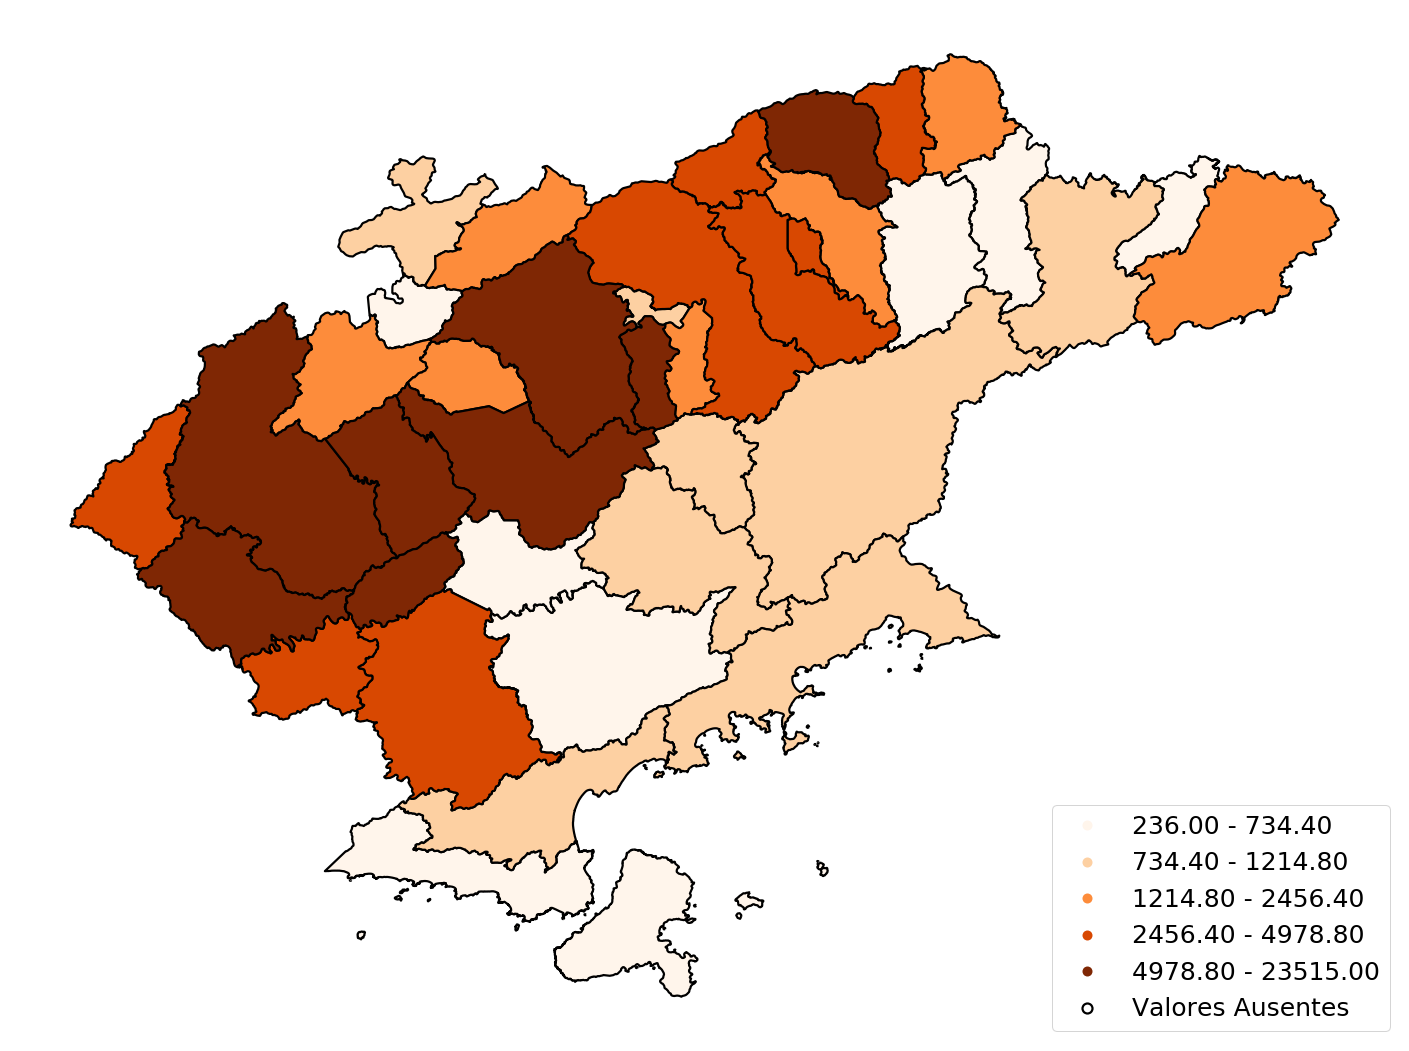

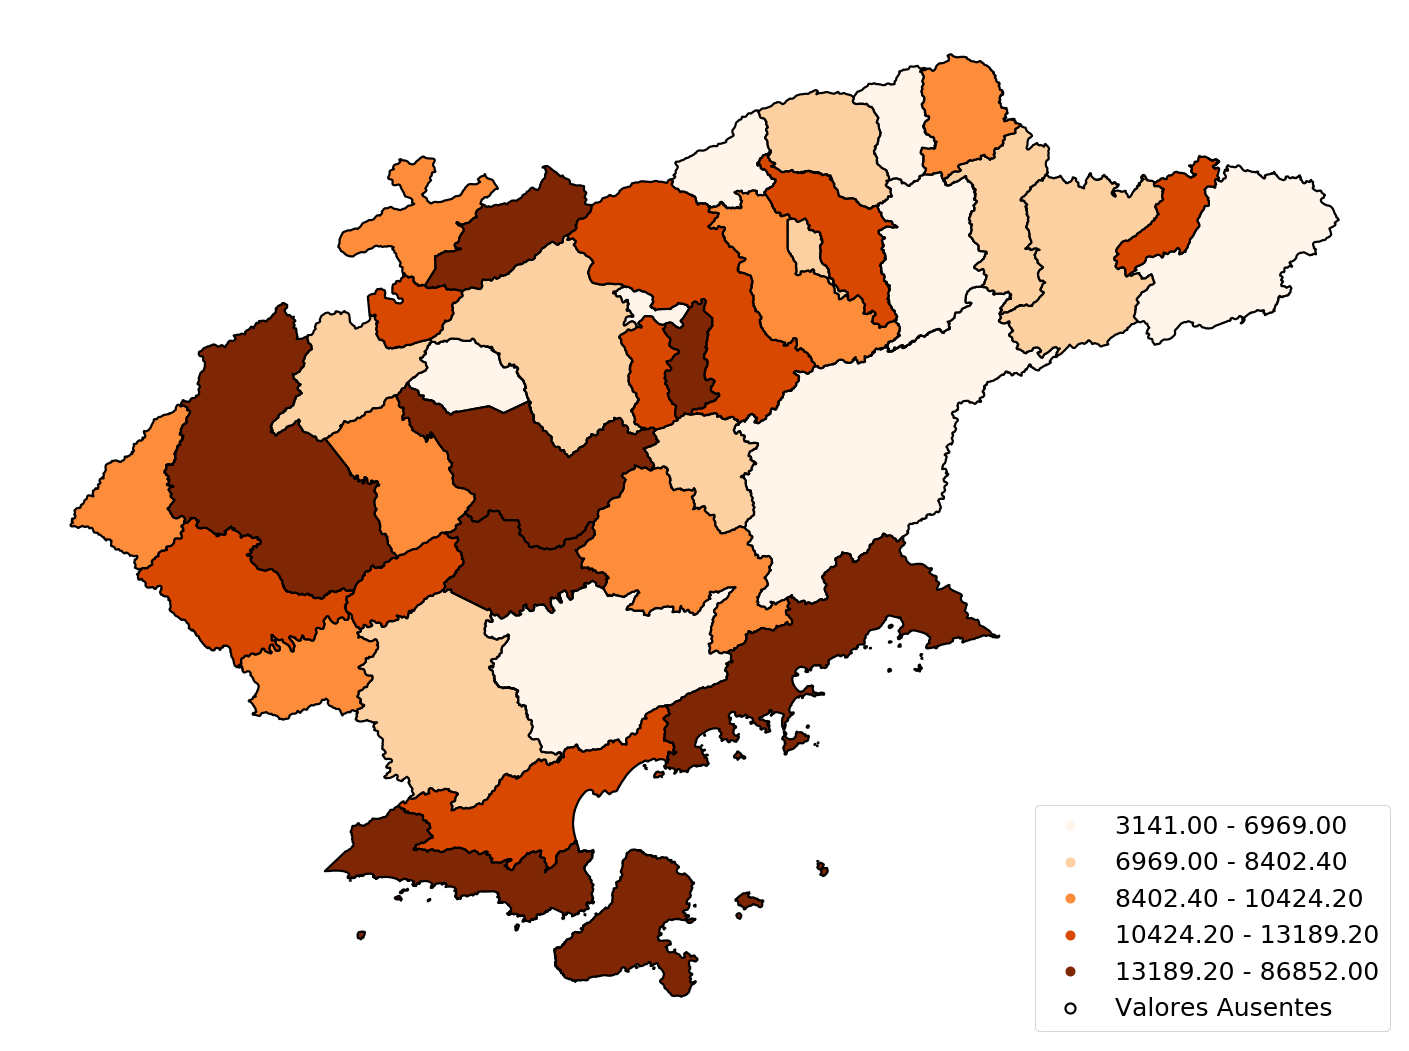

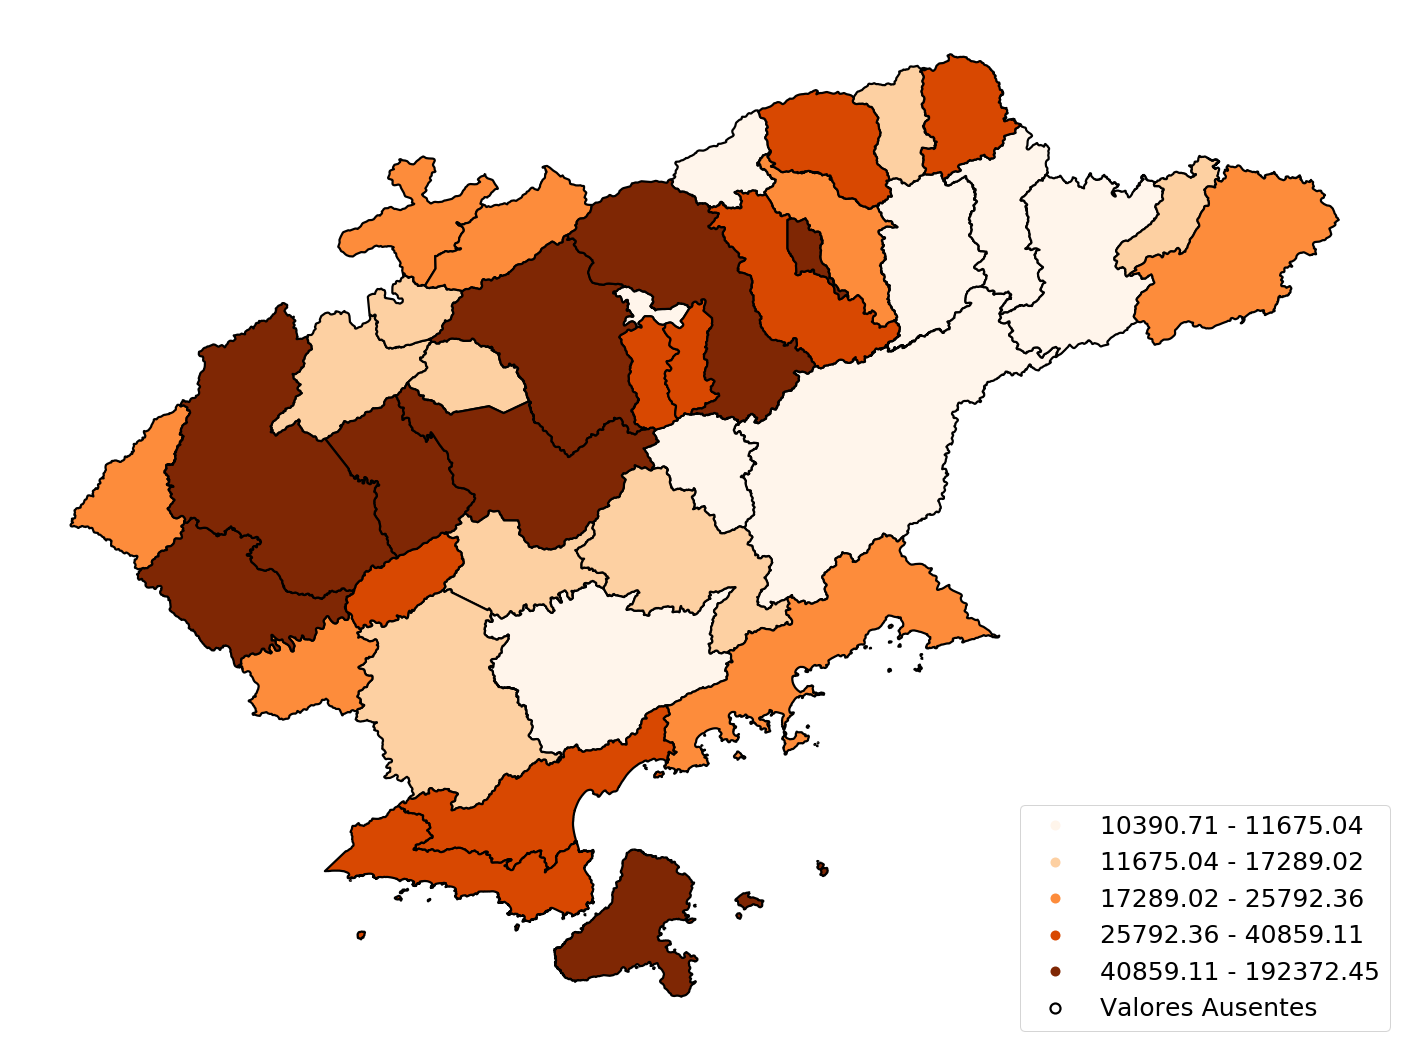

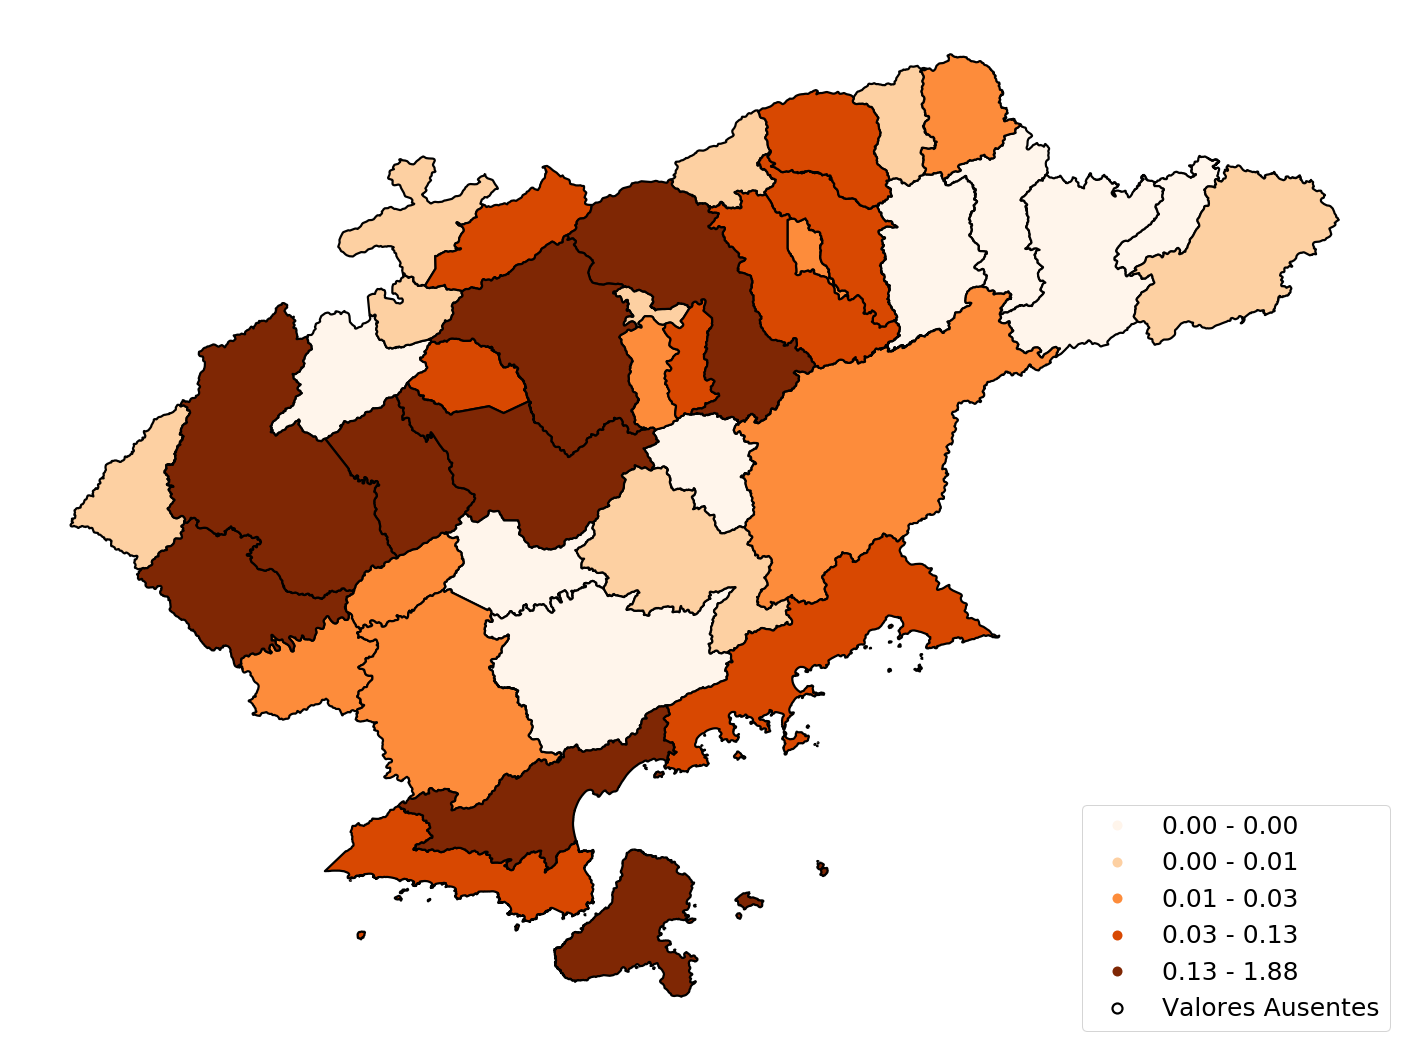

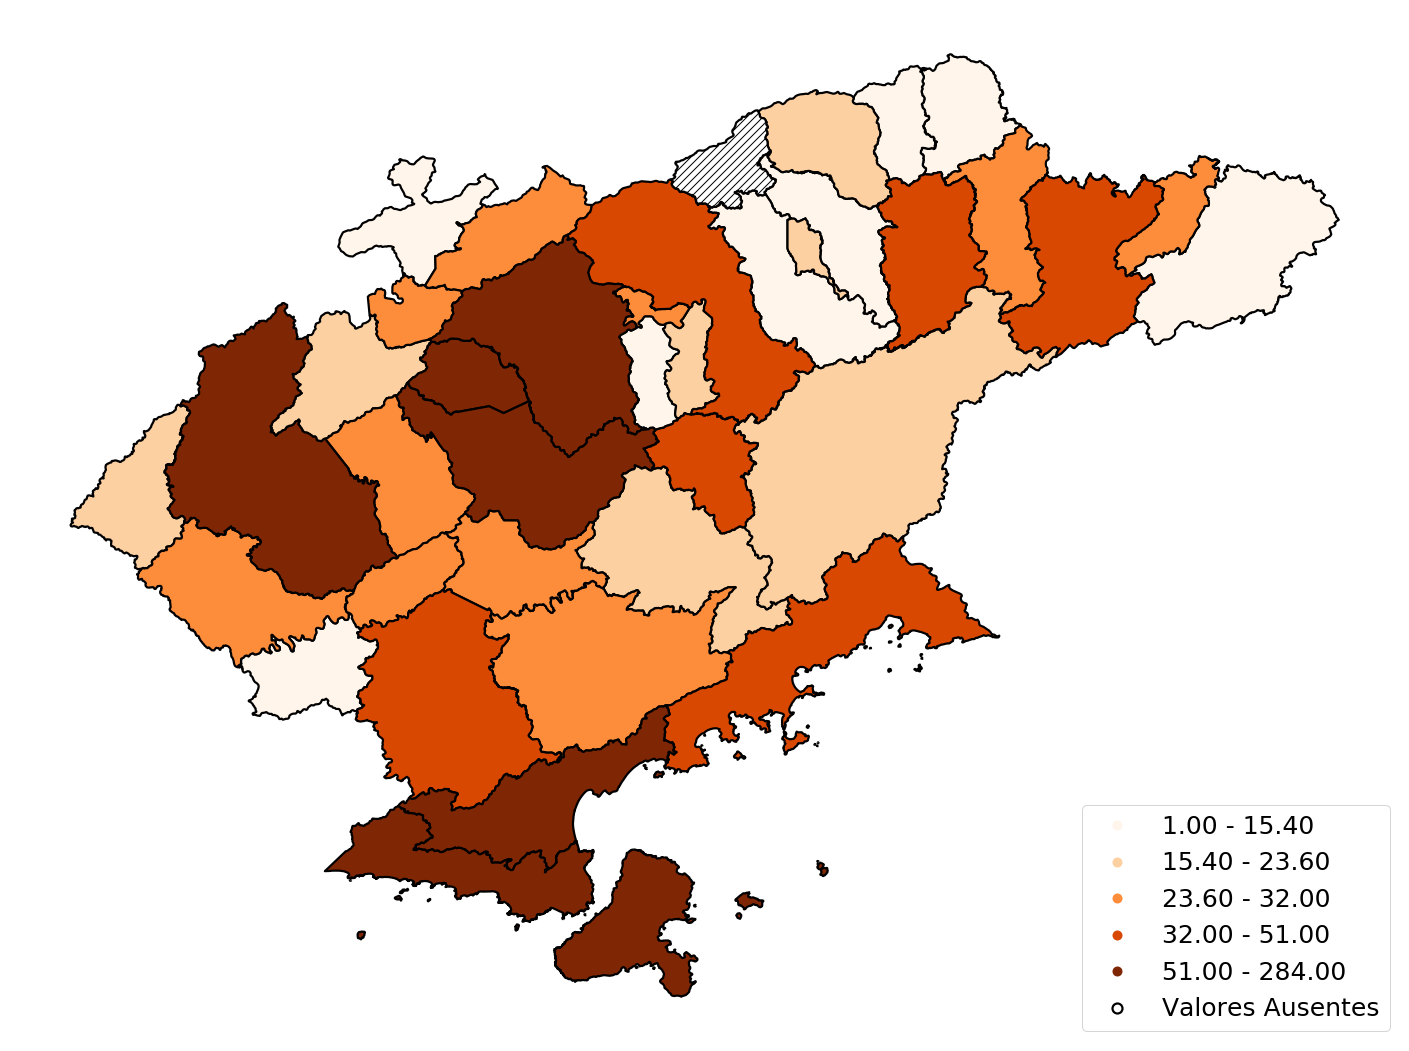

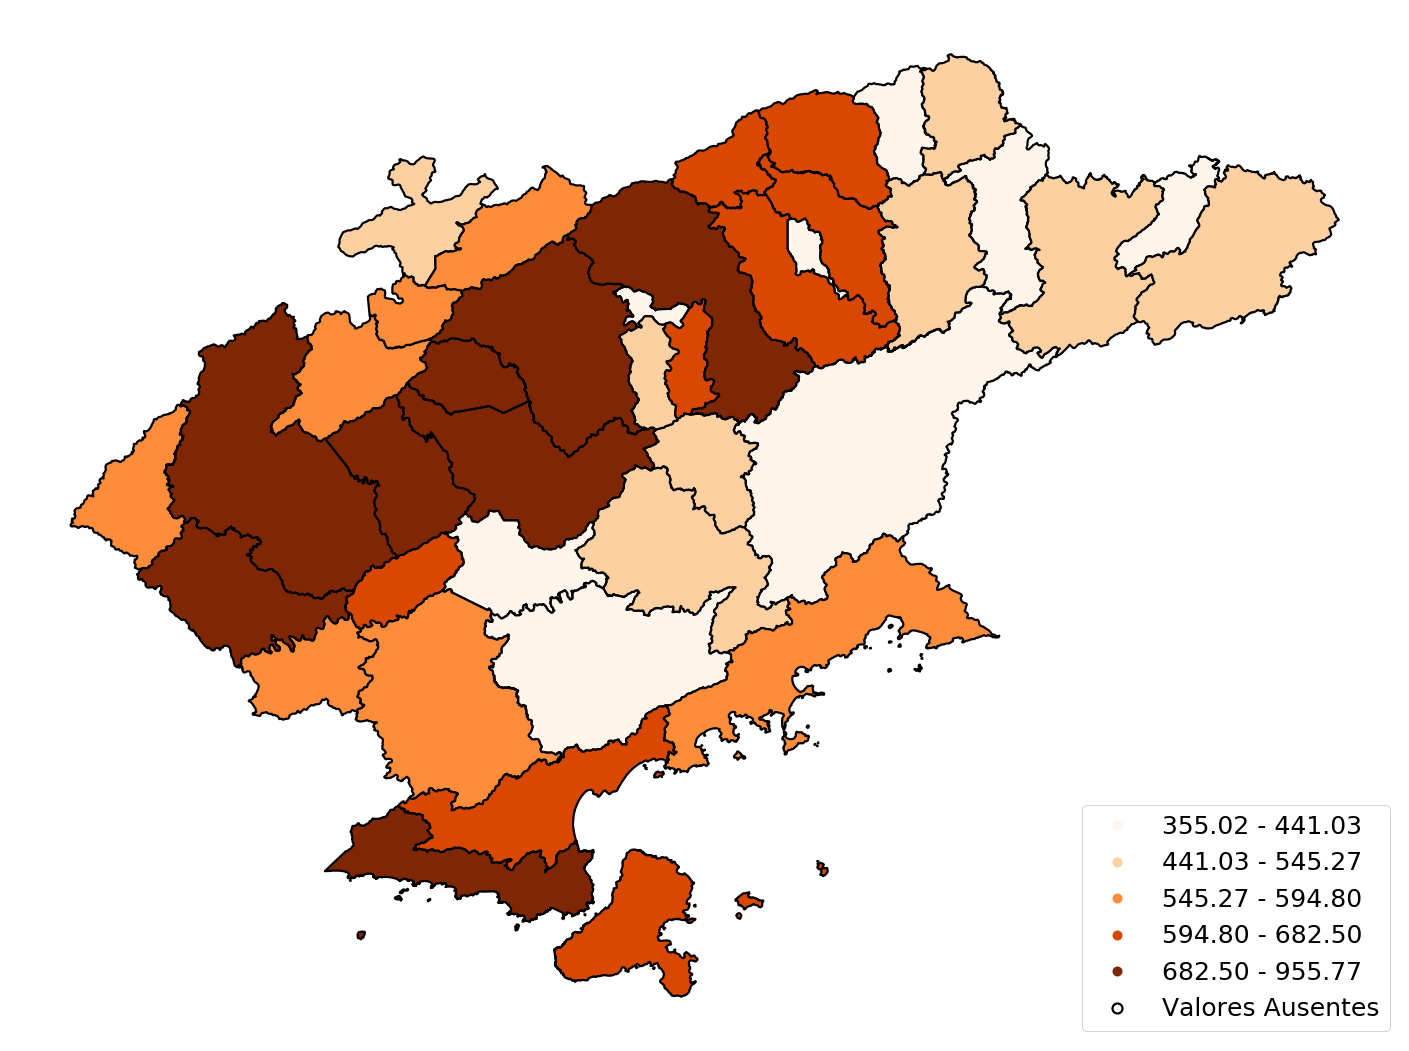

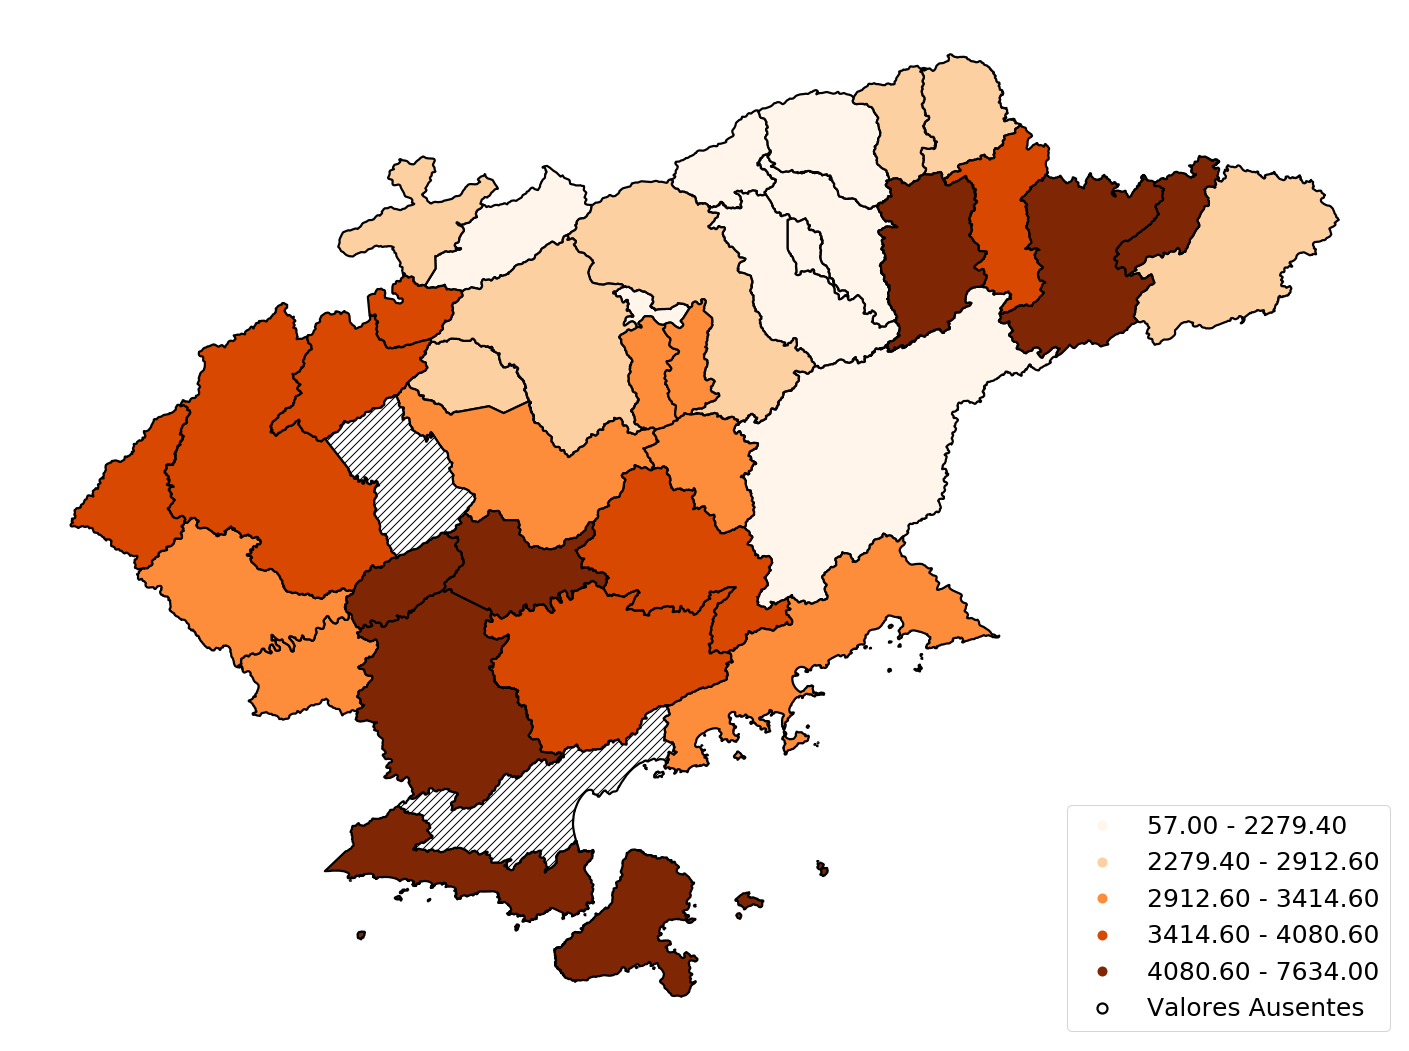

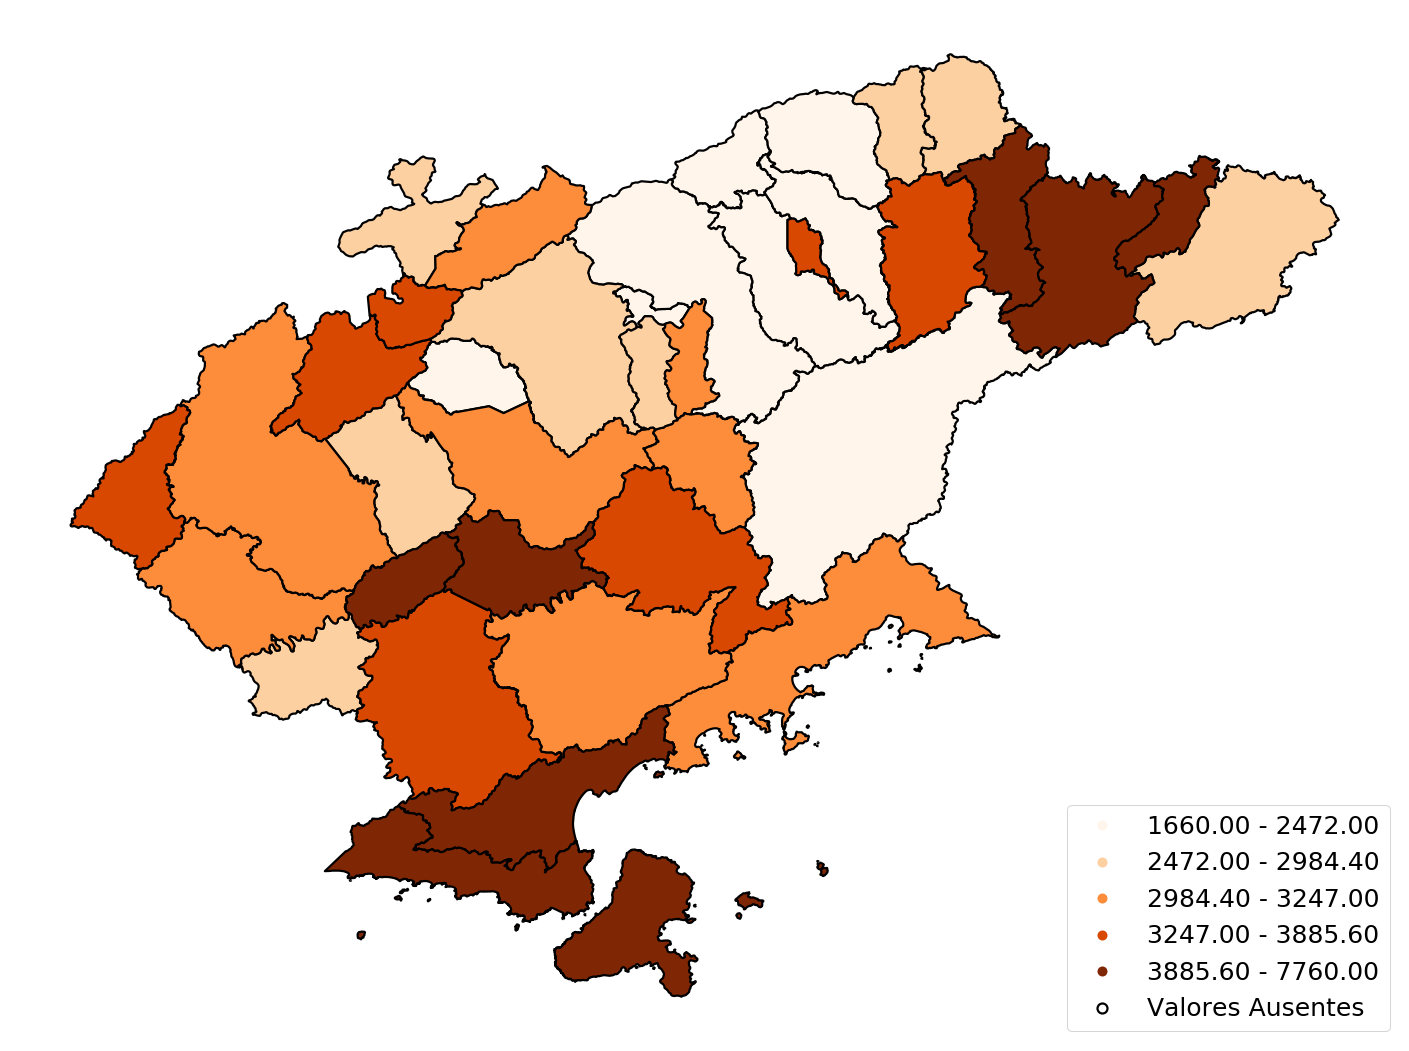

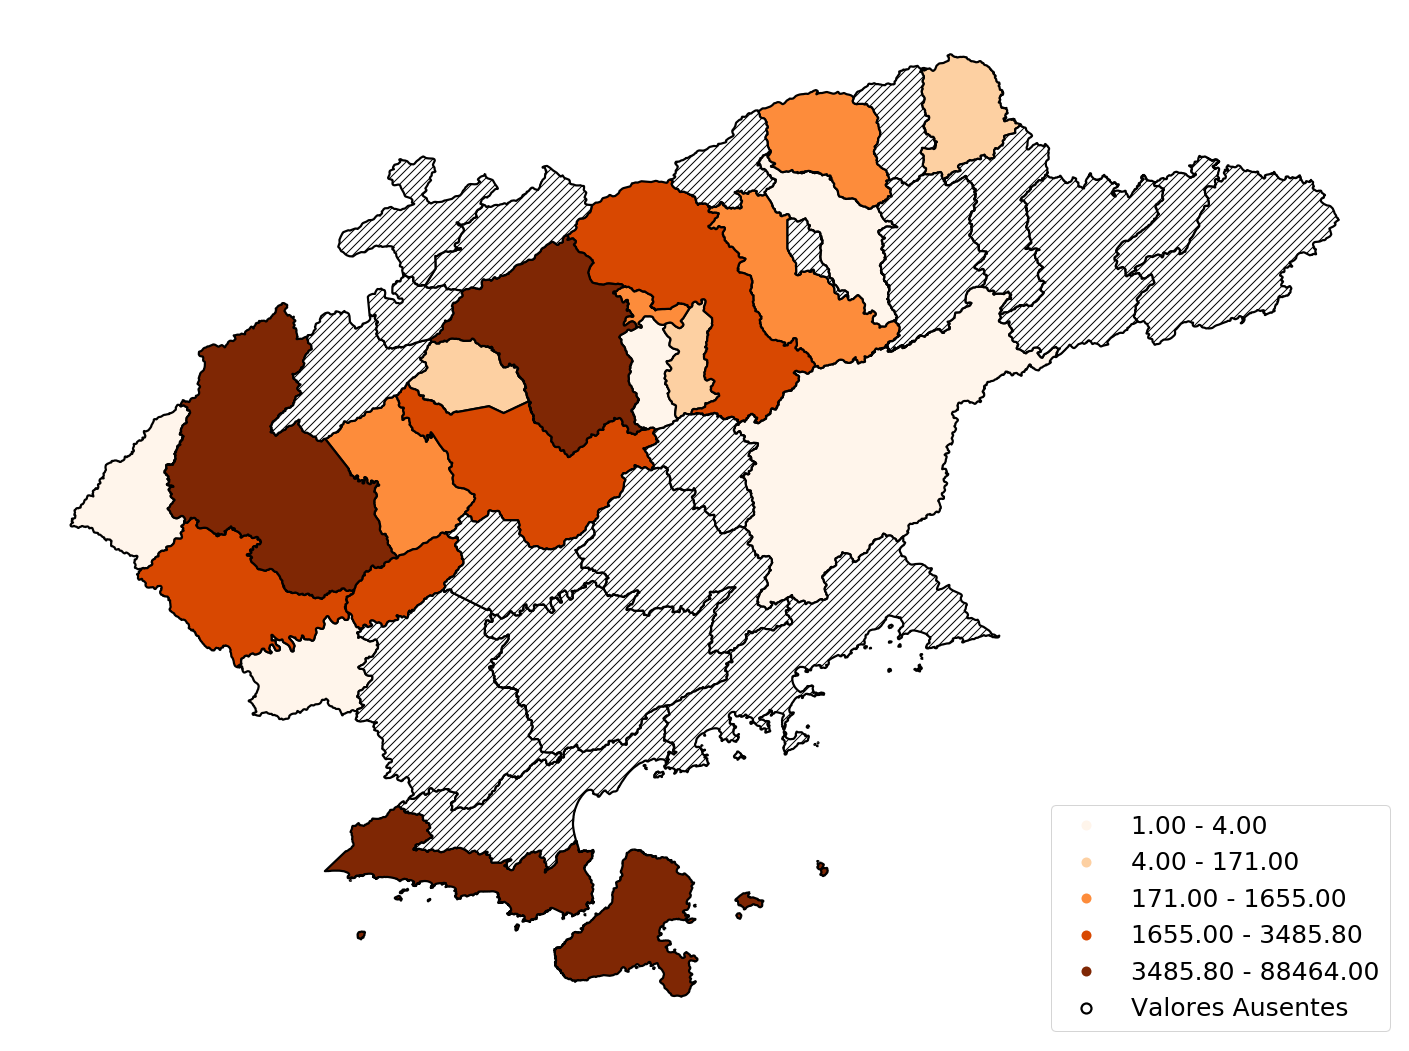

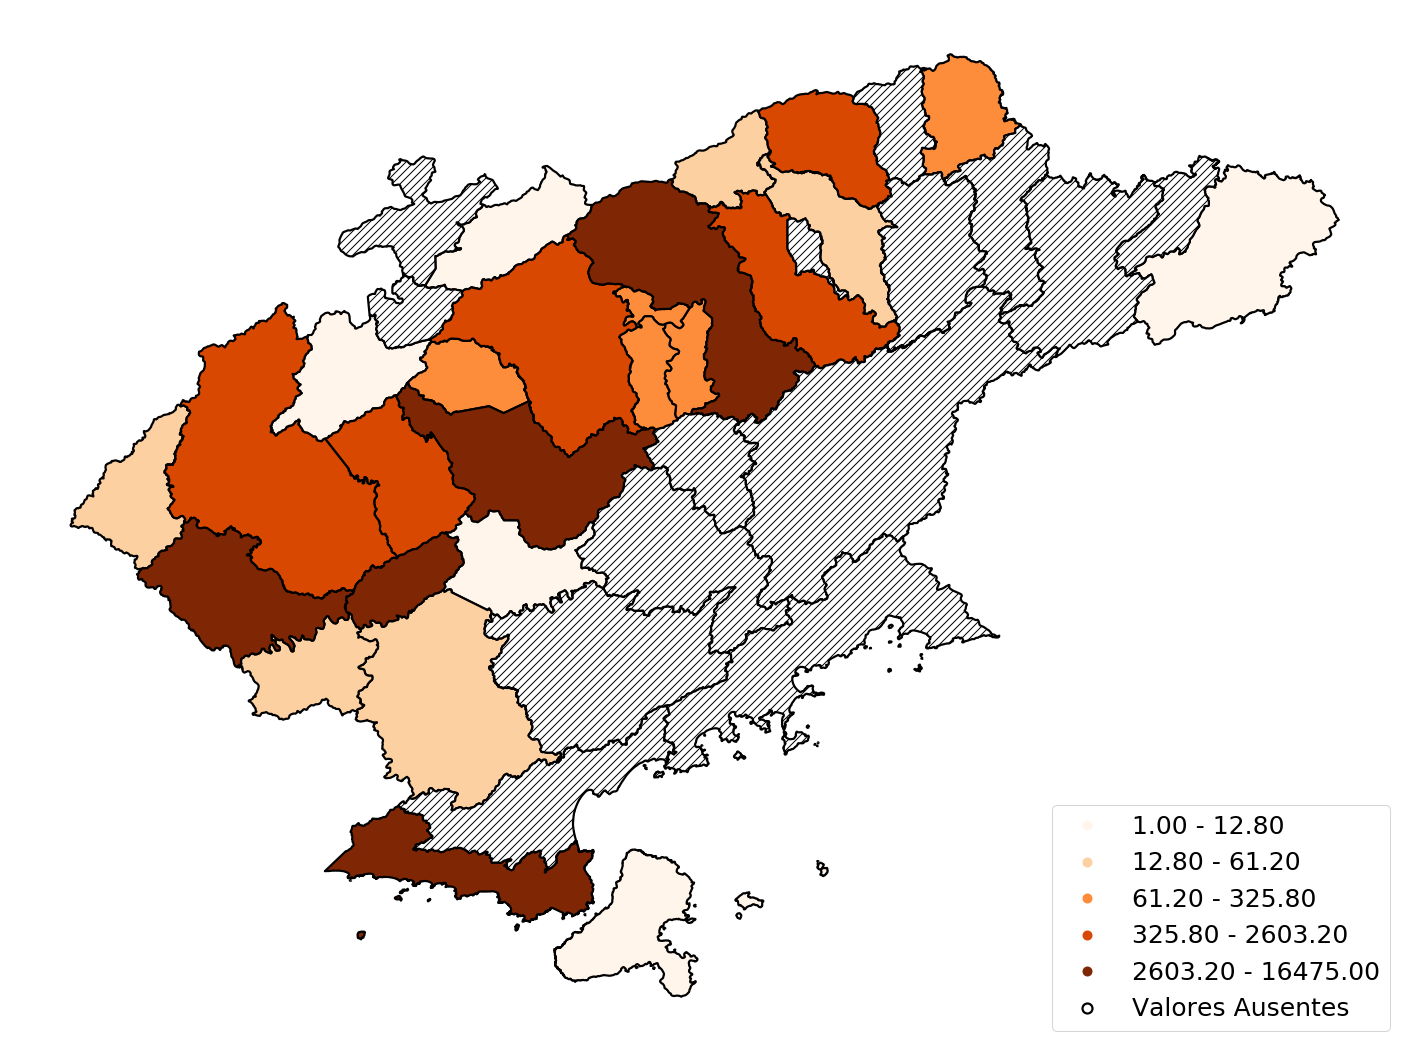

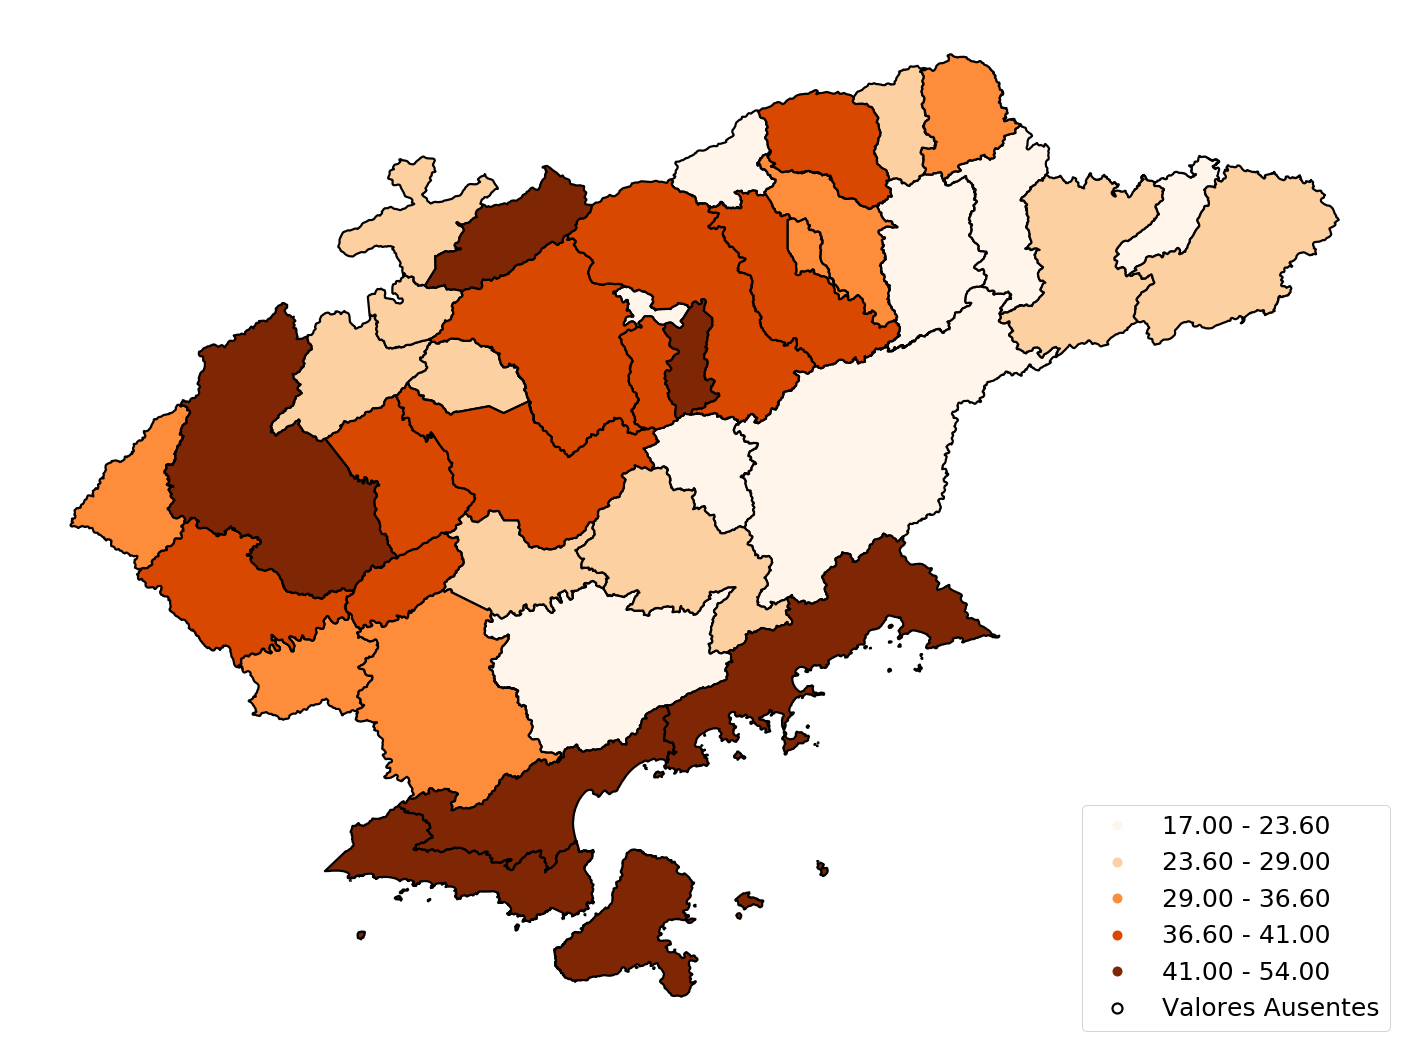

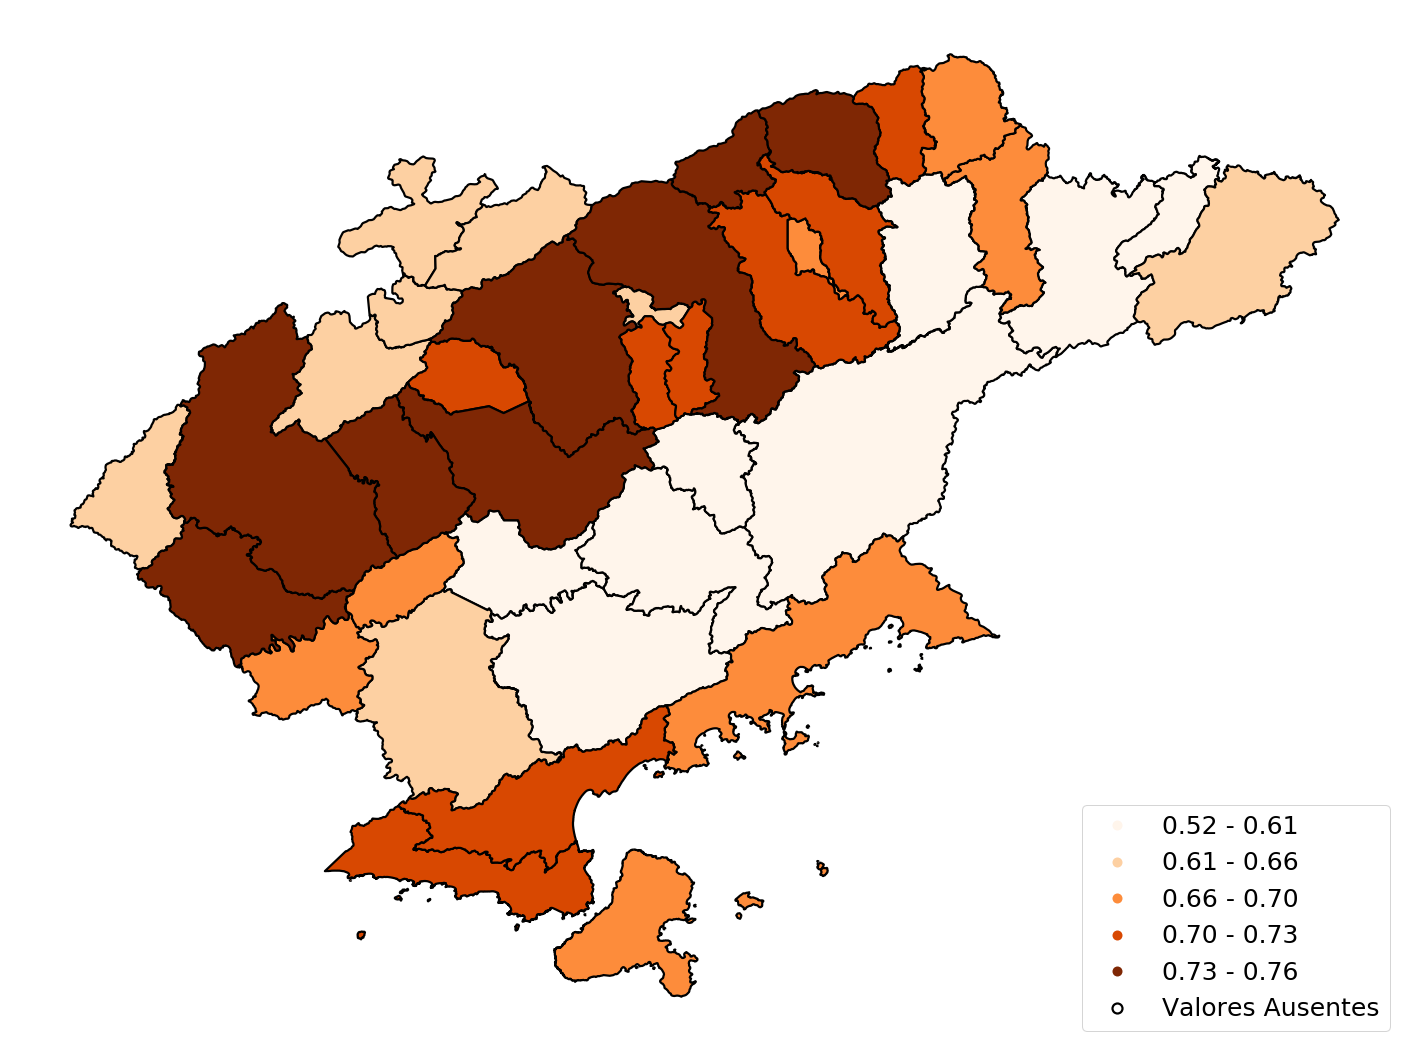

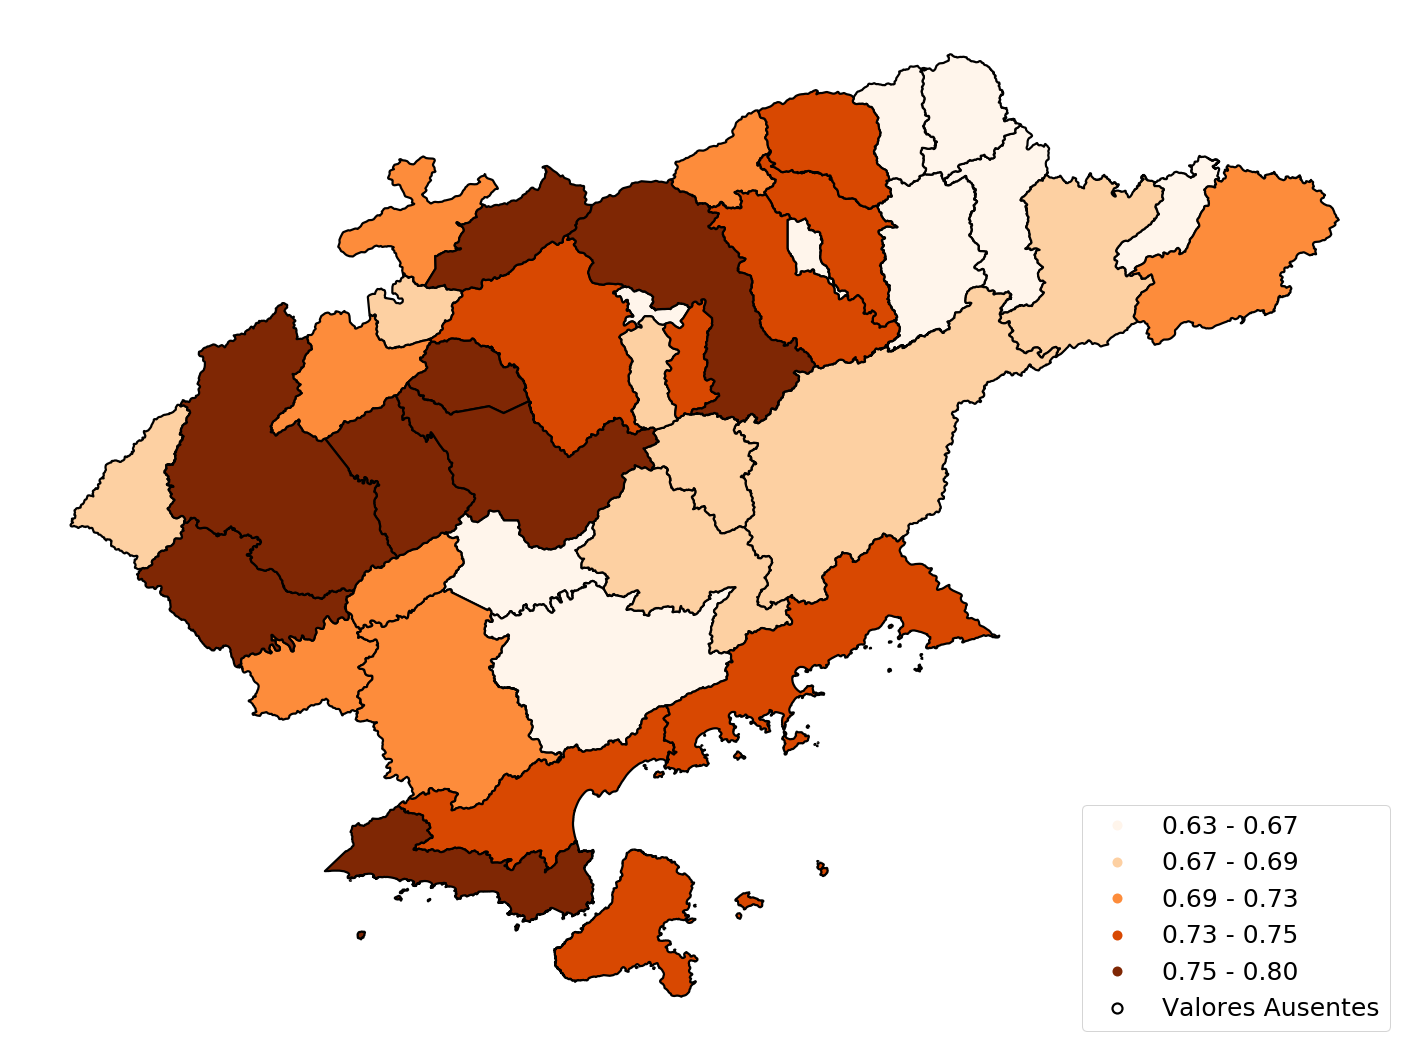

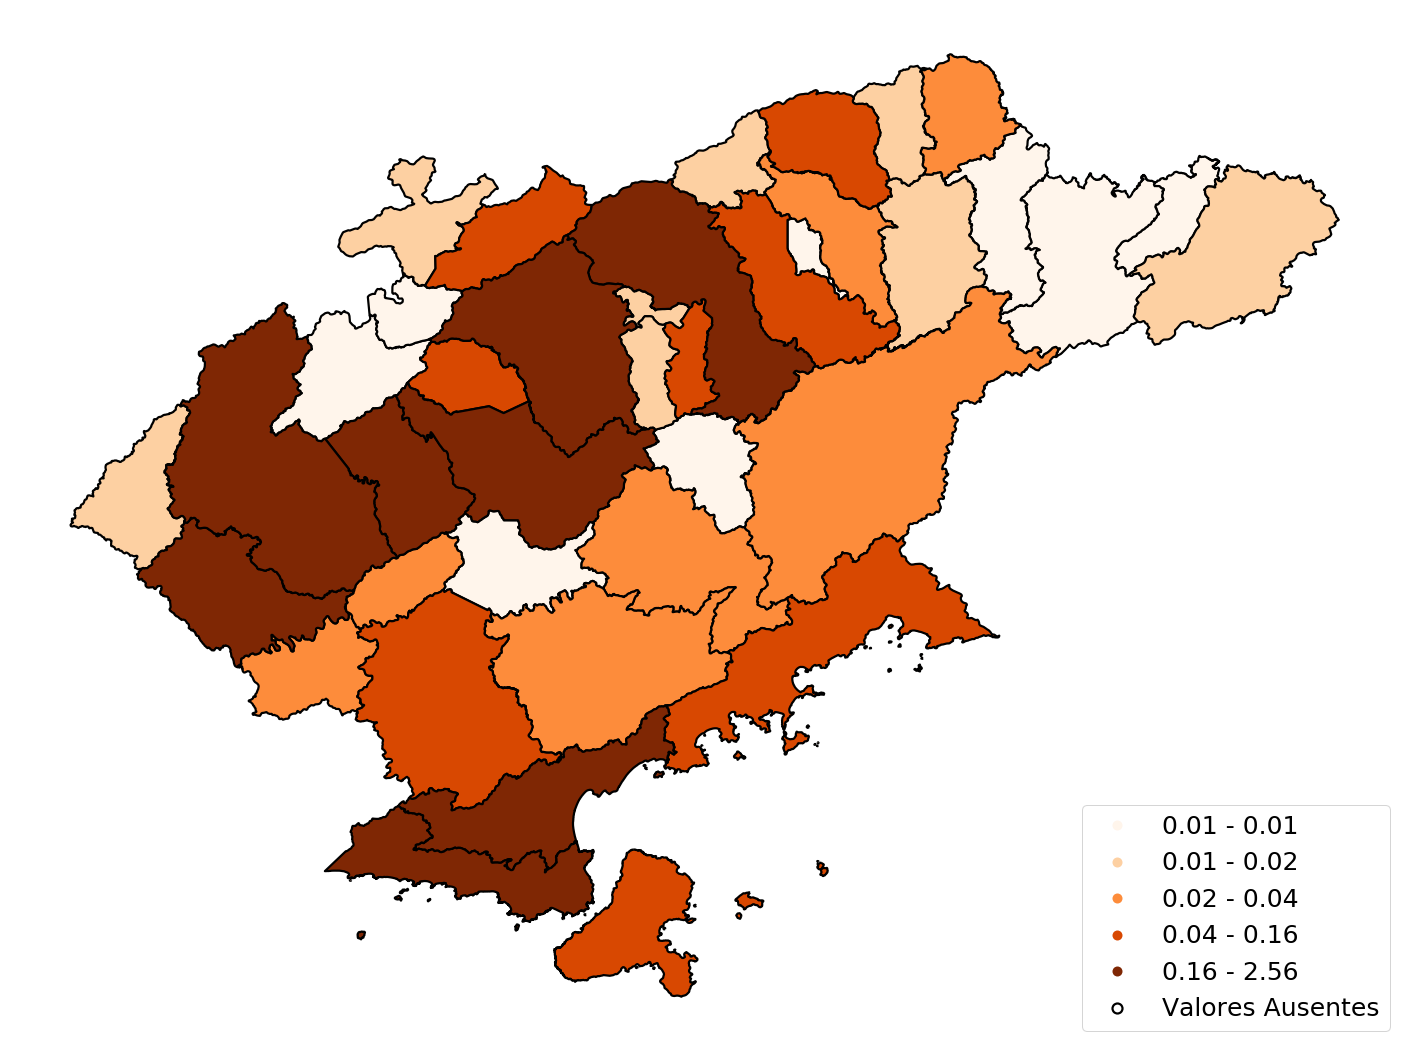

In [47]:
themes = yaml.load(open('../themes/vale_themes.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['vale_bars']

var_file = {}

for var in variables:
    print(var)
    #variables name and file dict
    var_file,file_name = vis_graphs.variable_name_file_name(dd_economia,var_file,var)
    
    #plot bars
    fig = vis_graphs.plot_bars(dd_economia,var,themes)
    plot(fig, filename=f"../../sample_pages/pages/indicadores_vale/pages/economia/images/bars/{file_name}.html", auto_open=False)
    
    #plot maps
    fig_map = vis_graphs.plot_map(dd_economia,sp,var)
    fig_map.savefig(f"../../sample_pages/pages/indicadores_vale/pages/economia/images/maps/{file_name}.png", bbox_inches='tight')
    

In [48]:
for var in var_file.keys():
    print(f"<option value='{var_file[var]}'>{var}</option>")

<option value='arrecadacao_municipal_de_contribuicoes_de_melhoria'>Arrecadação Municipal de Contribuições de Melhoria per capita - (2013) - (Em reais de 2019)</option>
<option value='arrecadacao_de_iptu'>Arrecadação de IPTU per capita - (2013) - (Em reais de 2019)</option>
<option value='arrecadacao_de_iss'>Arrecadação de ISS per capita - (2013) - (Em reais de 2019)</option>
<option value='arrecadacao_de_itbi'>Arrecadação de ITBI per capita - (2013) - (Em reais de 2019)</option>
<option value='consumo_de_energia_eletrica__total'>Consumo de Energia Elétrica - Total per capita - (2018) - (Em MWh)</option>
<option value='despesas_municipais_com_inativos_e_pensionistas'>Despesas Municipais com Inativos e Pensionistas per capita - (2013) - (Em reais de 2019)</option>
<option value='despesas_municipais_com_inversoes_financeiras'>Despesas Municipais com Inversões Financeiras per capita - (2013) - (Em reais de 2019)</option>
<option value='despesas_municipais_com_pessoal'>Despesas Municipais c

In [40]:
dd_economia

localidade  \
0                           Aparecida   
1                              Arapeí   
2                              Areias   
3                             Bananal   
4                  Cachoeira Paulista   
5                    Campos do Jordão   
6                               Canas   
7                       Caraguatatuba   
8                            Caçapava   
9                            Cruzeiro   
10                              Cunha   
11                Estado de São Paulo   
12                      Guaratinguetá   
13                            Igaratá   
14                           Ilhabela   
15                            Jacareí   
16                           Jambeiro   
17                           Lagoinha   
18                          Lavrinhas   
19                             Lorena   
20                    Monteiro Lobato   
21                Natividade da Serra   
22                          Paraibuna   
23                    Pindamonhangaba   
24                            Piquete   
25                              Potim   
26                             Queluz   
27                  Redenção da Serra   
28                            Roseira   
29                       Santa Branca   
30            Santo Antônio do Pinhal   
31                          Silveiras   
32               São Bento do Sapucaí   
33               São José do Barreiro   
34                São José dos Campos   
35             São Luiz do Paraitinga   
36                      São Sebastião   
37                            Taubaté   
38                           Tremembé   
39                            Ubatuba   
40    Vale do Paraíba e Litoral Norte   
41                          Aparecida   
42                             Arapeí   
43                             Areias   
44                            Bananal   
45                 Cachoeira Paulista   
46                   Campos do Jordão   
47                              Canas   
48                      Caraguatatuba   
49                           Caçapava   
50                           Cruzeiro   
51                              Cunha   
52                Estado de São Paulo   
53                      Guaratinguetá   
54                            Igaratá   
55                           Ilhabela   
56                            Jacareí   
57                           Jambeiro   
58                           Lagoinha   
59                          Lavrinhas   
60                             Lorena   
61                    Monteiro Lobato   
62                Natividade da Serra   
63                          Paraibuna   
64                    Pindamonhangaba   
65                            Piquete   
66                              Potim   
67                             Queluz   
68                  Redenção da Serra   
69                            Roseira   
70                       Santa Branca   
71            Santo Antônio do Pinhal   
72                          Silveiras   
73               São Bento do Sapucaí   
74               São José do Barreiro   
75                São José dos Campos   
76             São Luiz do Paraitinga   
77                      São Sebastião   
78                            Taubaté   
79                           Tremembé   
80                            Ubatuba   
81    Vale do Paraíba e Litoral Norte   
82                          Aparecida   
83                             Arapeí   
84                             Areias   
85                            Bananal   
86                 Cachoeira Paulista   
87                   Campos do Jordão   
88                              Canas   
89                      Caraguatatuba   
90                           Caçapava   
91                           Cruzeiro   
92                              Cunha   
93                Estado de São Paulo   
94                      Guaratinguetá   
95                            Igaratá   
96                           Ilhabela   
97       

In [292]:


from lightning import Lightning

from numpy import random, zeros




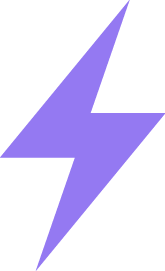

Problem connecting to server at http://public.lightning-viz.org
status code: 404


ValueError: Could not access server

In [293]:
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')

In [294]:
from lightning import Lightning

lgn = Lightning(host="http://my-lightning-instance.herokuapp.com")

lgn.create_session()
lgn.create_session("provide an optional session name")

Lightning initialized
Problem connecting to server at http://my-lightning-instance.herokuapp.com
status code: 404


ValueError: Could not access server